In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import numpy as np

In [ ]:
df_raw = pd.read_csv('AAPL.csv')
print(df_raw.columns)
print(df_raw.head())

Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
        Price                Close                 High                  Low  \
0      Ticker                 AAPL                 AAPL                 AAPL   
1        Date                  NaN                  NaN                  NaN   
2  1980-12-12  0.09872592240571976   0.0991551417254879  0.09872592240571976   
3  1980-12-15   0.0935753583908081  0.09400457783765653   0.0935753583908081   
4  1980-12-16  0.08670710027217865  0.08713631386494138  0.08670710027217865   

                  Open     Volume  
0                 AAPL       AAPL  
1                  NaN        NaN  
2  0.09872592240571976  469033600  
3  0.09400457783765653  175884800  
4  0.08713631386494138  105728000  


In [ ]:
# Read CSV skipping the first two metadata rows
df = pd.read_csv('AAPL.csv', skiprows=3, header=None)

# Set proper column names
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

print(df.head())

         Date     Close      High       Low      Open     Volume
0  1980-12-12  0.098726  0.099155  0.098726  0.098726  469033600
1  1980-12-15  0.093575  0.094005  0.093575  0.094005  175884800
2  1980-12-16  0.086707  0.087136  0.086707  0.087136  105728000
3  1980-12-17  0.088853  0.089282  0.088853  0.088853   86441600
4  1980-12-18  0.091429  0.091858  0.091429  0.091429   73449600


In [ ]:
# Convert 'Date' column to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)

# Ensure daily frequency and interpolate missing Close values
df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)


<ipython-input-11-abc0bfdcb3c7>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Close'].interpolate(method='time', inplace=True)


In [ ]:
train = df.loc['2018-01-01':'2023-12-31']['Close']
test = df.loc['2024-01-01':'2024-12-31']['Close']

In [ ]:
model = SARIMAX(train, order=(2,1,3), seasonal_order=(1,1,1,12), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


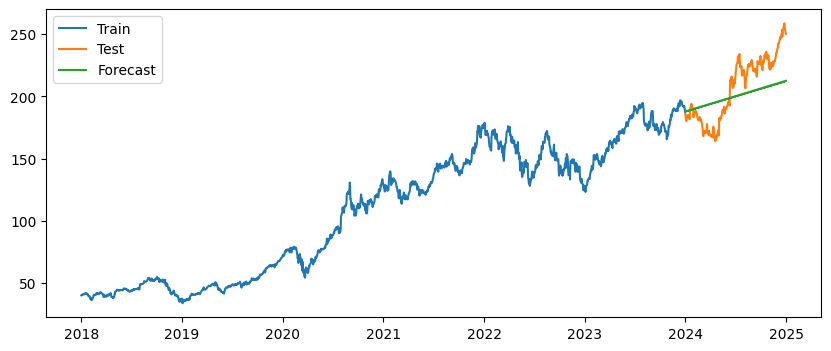

RMSE: 20.62, MAE: 18.11 MAPE: 0.09 R2: 0.35


In [ ]:
forecast = results.forecast(steps=len(test))
plt.figure(figsize=(10,4))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()

# Metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mape = mean_absolute_percentage_error(test, forecast)
r2 = r2_score(test, forecast)
print(f'RMSE: {rmse:.2f}, MAE: {mae:.2f}', f'MAPE: {mape:.2f}', f'R2: {r2:.2f}')


<ipython-input-17-b4e124dc63e2>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Close'].interpolate(method='time', inplace=True)


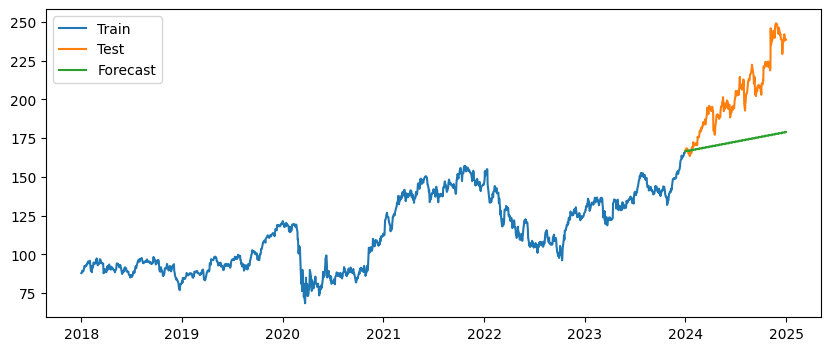

RMSE: 35.43, MAE: 30.01 MAPE: 0.14 R2: -1.50


In [ ]:
# Read CSV skipping the first two metadata rows
df = pd.read_csv('JPM.csv', skiprows=3, header=None)

# Set proper column names
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)

# Ensure daily frequency and interpolate missing Close values
df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

train = df.loc['2018-01-01':'2023-12-31']['Close']
test = df.loc['2024-01-01':'2024-12-31']['Close']

model = SARIMAX(train, order=(2,1,3), seasonal_order=(1,1,1,12), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

forecast = results.forecast(steps=len(test))
plt.figure(figsize=(10,4))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()

# Metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mape = mean_absolute_percentage_error(test, forecast)
r2 = r2_score(test, forecast)
print(f'RMSE: {rmse:.2f}, MAE: {mae:.2f}', f'MAPE: {mape:.2f}', f'R2: {r2:.2f}')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Read CSV skipping the first two metadata rows
df = pd.read_csv('JPM.csv', skiprows=3, header=None)
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)

df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

# Define sliding windows: (train_start, train_end, test_start, test_end)
periods = [
    ('2018-01-01', '2023-12-31', '2024-01-01', '2024-12-31'),
    ('2015-01-01', '2020-12-31', '2021-01-01', '2021-12-31'),
    ('2012-01-01', '2017-12-31', '2018-01-01', '2018-12-31'),
    ('2009-01-01', '2014-12-31', '2015-01-01', '2015-12-31')
]

rmse_list, mae_list, mape_list, r2_list = [], [], [], []

for train_start, train_end, test_start, test_end in periods:
    train = df.loc[train_start:train_end]['Close']
    test = df.loc[test_start:test_end]['Close']

    model = SARIMAX(train, order=(2,1,3), seasonal_order=(1,1,1,12),
                    enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=False)

    forecast = results.forecast(steps=len(test))

    rmse = np.sqrt(mean_squared_error(test, forecast))
    mae = mean_absolute_error(test, forecast)
    mape = mean_absolute_percentage_error(test, forecast)
    r2 = r2_score(test, forecast)

    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)
    r2_list.append(r2)

    print(f'Period Train:{train_start} to {train_end}, Test:{test_start} to {test_end}')
    print(f'  RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.4f}, R2: {r2:.2f}\n')

# Average metrics
print('Average Metrics Over 4 Periods:')
print(f'RMSE: {np.mean(rmse_list):.2f}')
print(f'MAE: {np.mean(mae_list):.2f}')
print(f'MAPE: {np.mean(mape_list):.4f}')
print(f'R2: {np.mean(r2_list):.2f}')

<ipython-input-18-a37f6e543e04>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Close'].interpolate(method='time', inplace=True)


Period Train:2018-01-01 to 2023-12-31, Test:2024-01-01 to 2024-12-31
  RMSE: 35.43, MAE: 30.01, MAPE: 0.1398, R2: -1.50



/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Period Train:2015-01-01 to 2020-12-31, Test:2021-01-01 to 2021-12-31
  RMSE: 21.24, MAE: 20.14, MAPE: 0.1404, R2: -3.96



/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Period Train:2012-01-01 to 2017-12-31, Test:2018-01-01 to 2018-12-31
  RMSE: 6.87, MAE: 4.91, MAPE: 0.0556, R2: -2.05



/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Period Train:2009-01-01 to 2014-12-31, Test:2015-01-01 to 2015-12-31
  RMSE: 2.46, MAE: 2.09, MAPE: 0.0437, R2: 0.33

Average Metrics Over 4 Periods:
RMSE: 16.50
MAE: 14.29
MAPE: 0.0949
R2: -1.79


<ipython-input-19-2f2a596c8910>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Close'].interpolate(method='time', inplace=True)


Period Train:2018-01-01 to 2023-12-31, Test:2024-01-01 to 2024-12-31
  RMSE: 35.43, MAE: 30.01, MAPE: 0.1398, R2: -1.50



/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Period Train:2015-01-01 to 2020-12-31, Test:2021-01-01 to 2021-12-31
  RMSE: 21.24, MAE: 20.14, MAPE: 0.1404, R2: -3.96



/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Period Train:2012-01-01 to 2017-12-31, Test:2018-01-01 to 2018-12-31
  RMSE: 6.87, MAE: 4.91, MAPE: 0.0556, R2: -2.05



/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Period Train:2009-01-01 to 2014-12-31, Test:2015-01-01 to 2015-12-31
  RMSE: 2.46, MAE: 2.09, MAPE: 0.0437, R2: 0.33



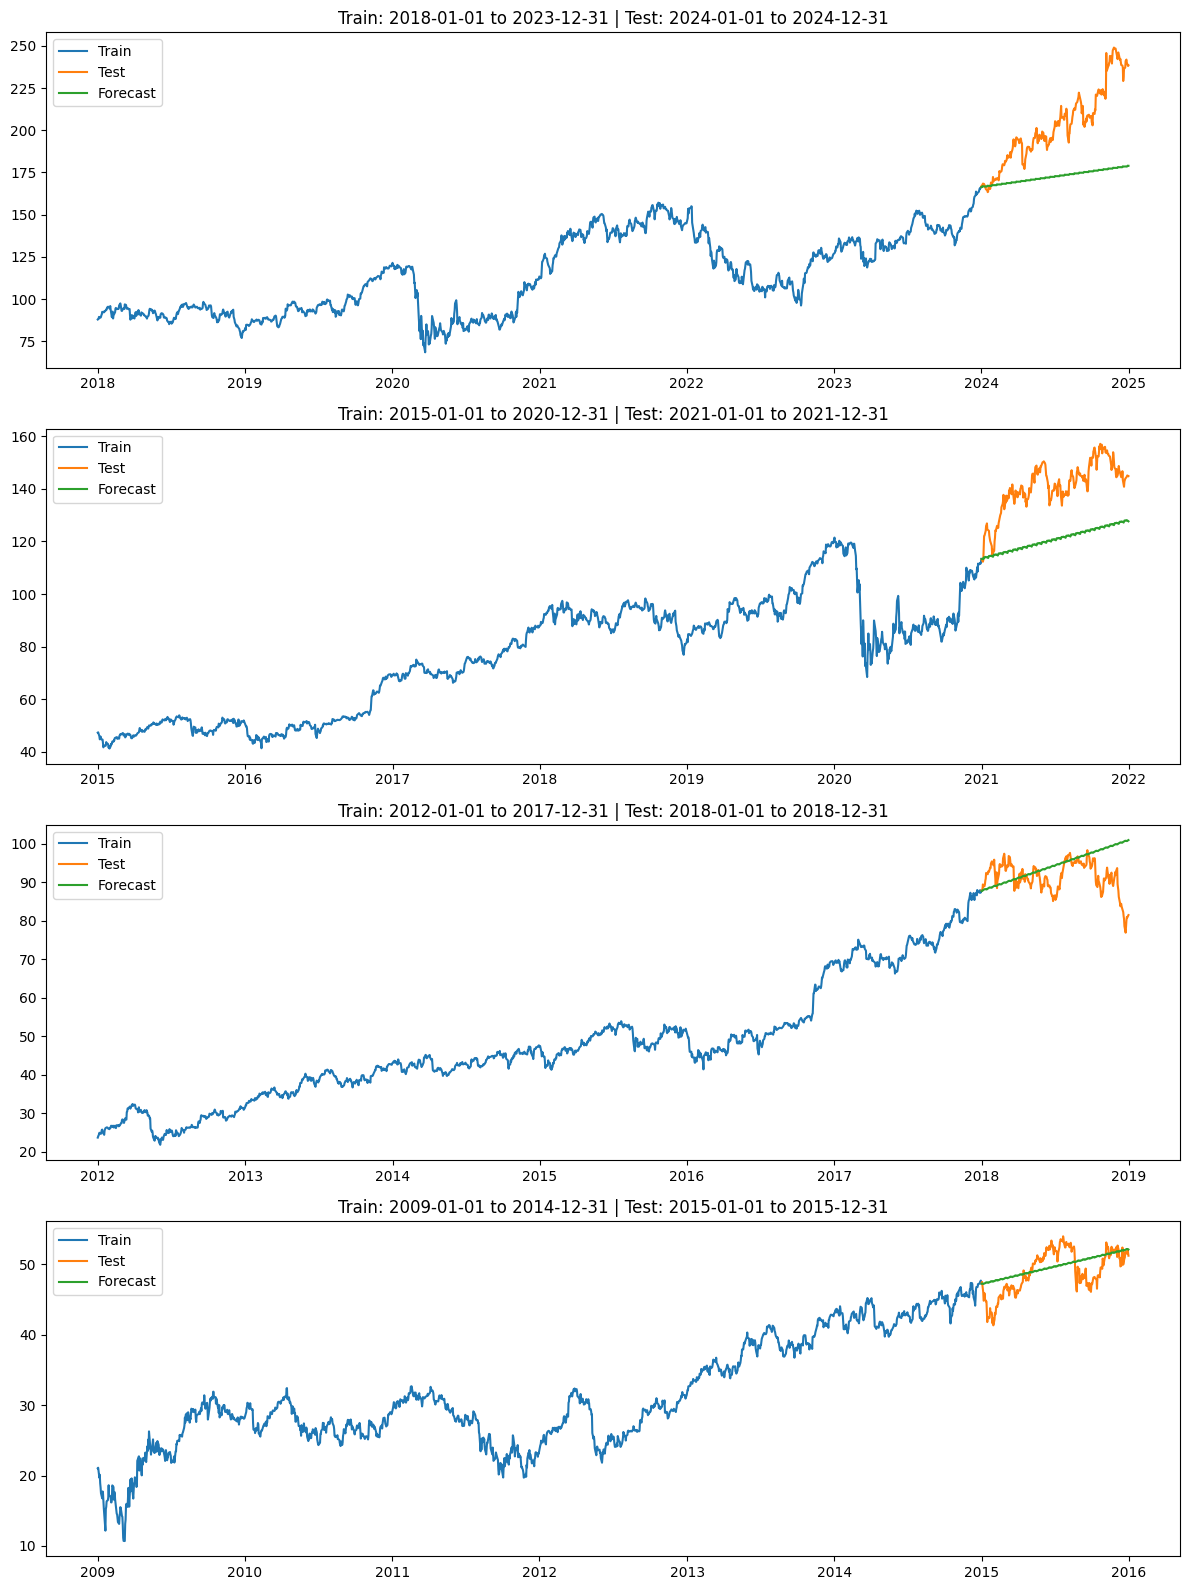

Average Metrics Over 4 Periods:
RMSE: 16.50
MAE: 14.29
MAPE: 0.0949
R2: -1.79


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Read CSV skipping the first two metadata rows
df = pd.read_csv('JPM.csv', skiprows=3, header=None)
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)

df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

periods = [
    ('2018-01-01', '2023-12-31', '2024-01-01', '2024-12-31'),
    ('2015-01-01', '2020-12-31', '2021-01-01', '2021-12-31'),
    ('2012-01-01', '2017-12-31', '2018-01-01', '2018-12-31'),
    ('2009-01-01', '2014-12-31', '2015-01-01', '2015-12-31')
]

rmse_list, mae_list, mape_list, r2_list = [], [], [], []

# Prepare subplots: 4 rows, 1 col
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 16), sharex=False)

for i, (train_start, train_end, test_start, test_end) in enumerate(periods):
    train = df.loc[train_start:train_end]['Close']
    test = df.loc[test_start:test_end]['Close']

    model = SARIMAX(train, order=(2,1,3), seasonal_order=(1,1,1,12),
                    enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=False)

    forecast = results.forecast(steps=len(test))

    rmse = np.sqrt(mean_squared_error(test, forecast))
    mae = mean_absolute_error(test, forecast)
    mape = mean_absolute_percentage_error(test, forecast)
    r2 = r2_score(test, forecast)

    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)
    r2_list.append(r2)

    print(f'Period Train:{train_start} to {train_end}, Test:{test_start} to {test_end}')
    print(f'  RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.4f}, R2: {r2:.2f}\n')

    ax = axes[i]
    ax.plot(train.index, train, label='Train')
    ax.plot(test.index, test, label='Test')
    ax.plot(test.index, forecast, label='Forecast')
    ax.set_title(f'Train: {train_start} to {train_end} | Test: {test_start} to {test_end}')
    ax.legend()

plt.tight_layout()
plt.show()

print('Average Metrics Over 4 Periods:')
print(f'RMSE: {np.mean(rmse_list):.2f}')
print(f'MAE: {np.mean(mae_list):.2f}')
print(f'MAPE: {np.mean(mape_list):.4f}')
print(f'R2: {np.mean(r2_list):.2f}')



Grid search for period: Train 2018-01-01–2023-12-31, Test 2024-01-01–2024-12-31
Best SARIMA order=(1, 1, 1), seasonal_order=(0, 1, 0, 7), RMSE=33.70
Final Metrics - RMSE: 33.70, MAE: 28.22, MAPE: 0.1312, R2: -1.26

Grid search for period: Train 2015-01-01–2020-12-31, Test 2021-01-01–2021-12-31
Best SARIMA order=(1, 1, 1), seasonal_order=(1, 1, 0, 7), RMSE=20.62
Final Metrics - RMSE: 20.62, MAE: 19.45, MAPE: 0.1353, R2: -3.68

Grid search for period: Train 2012-01-01–2017-12-31, Test 2018-01-01–2018-12-31
Best SARIMA order=(2, 1, 2), seasonal_order=(0, 1, 0, 7), RMSE=4.75
Final Metrics - RMSE: 4.75, MAE: 3.79, MAPE: 0.0418, R2: -0.46

Grid search for period: Train 2009-01-01–2014-12-31, Test 2015-01-01–2015-12-31
Best SARIMA order=(0, 1, 0), seasonal_order=(0, 1, 1, 7), RMSE=2.44
Final Metrics - RMSE: 2.44, MAE: 2.07, MAPE: 0.0432, R2: 0.34


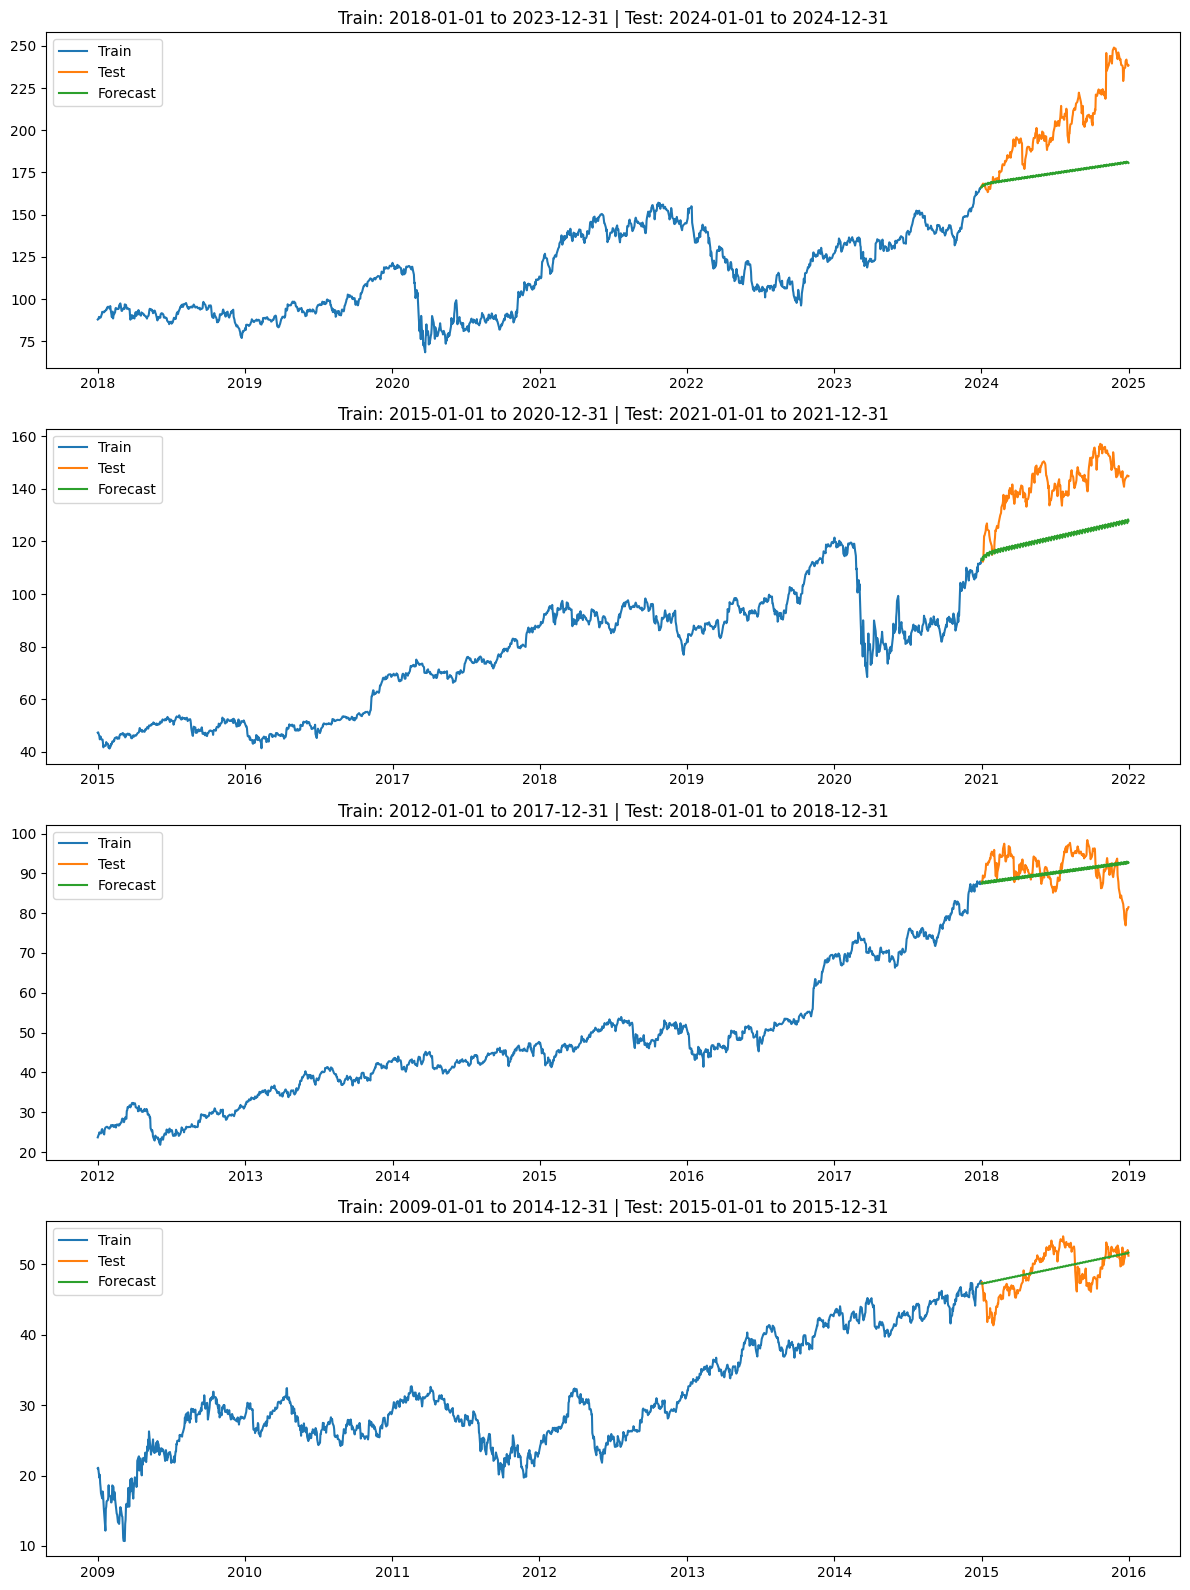


Average Metrics Over 4 Periods:
RMSE: 15.38
MAE: 13.38
MAPE: 0.0879
R2: -1.26


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from itertools import product
import warnings
warnings.filterwarnings('ignore')

# Load and preprocess data
df = pd.read_csv('JPM.csv', skiprows=3, header=None)
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)
df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

# Define sliding windows
periods = [
    ('2018-01-01', '2023-12-31', '2024-01-01', '2024-12-31'),
    ('2015-01-01', '2020-12-31', '2021-01-01', '2021-12-31'),
    ('2012-01-01', '2017-12-31', '2018-01-01', '2018-12-31'),
    ('2009-01-01', '2014-12-31', '2015-01-01', '2015-12-31')
]

# Hyperparameter grids
p = d = q = range(0, 3)
P = D = Q = range(0, 2)
m_values = [5, 7]  # Try both weekly and trading-week seasonality

rmse_list, mae_list, mape_list, r2_list = [], [], [], []

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 16), sharex=False)

for i, (train_start, train_end, test_start, test_end) in enumerate(periods):
    train = df.loc[train_start:train_end]['Close']
    test = df.loc[test_start:test_end]['Close']

    best_rmse = float('inf')
    best_order = None
    best_seasonal_order = None
    best_forecast = None

    print(f"\nGrid search for period: Train {train_start}–{train_end}, Test {test_start}–{test_end}")

    for order in product(p, [1], q):  # Fix d=1
        for seasonal_order in product(P, [1], Q, m_values):  # Fix D=1
            try:
                model = SARIMAX(train, order=order, seasonal_order=seasonal_order,
                                enforce_stationarity=False, enforce_invertibility=False)
                results = model.fit(disp=False)
                forecast = results.forecast(steps=len(test))
                rmse = np.sqrt(mean_squared_error(test, forecast))

                if rmse < best_rmse:
                    best_rmse = rmse
                    best_order = order
                    best_seasonal_order = seasonal_order
                    best_forecast = forecast
            except:
                continue

    # Final model with best params
    print(f"Best SARIMA order={best_order}, seasonal_order={best_seasonal_order}, RMSE={best_rmse:.2f}")

    model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order,
                    enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=False)
    forecast = results.forecast(steps=len(test))

    # Metrics
    rmse = np.sqrt(mean_squared_error(test, forecast))
    mae = mean_absolute_error(test, forecast)
    mape = mean_absolute_percentage_error(test, forecast)
    r2 = r2_score(test, forecast)

    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)
    r2_list.append(r2)

    print(f"Final Metrics - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.4f}, R2: {r2:.2f}")

    # Plot
    ax = axes[i]
    ax.plot(train.index, train, label='Train')
    ax.plot(test.index, test, label='Test')
    ax.plot(test.index, forecast, label='Forecast')
    ax.set_title(f'Train: {train_start} to {train_end} | Test: {test_start} to {test_end}')
    ax.legend()

plt.tight_layout()
plt.show()

# Print average metrics
print('\nAverage Metrics Over 4 Periods:')
print(f'RMSE: {np.mean(rmse_list):.2f}')
print(f'MAE: {np.mean(mae_list):.2f}')
print(f'MAPE: {np.mean(mape_list):.4f}')
print(f'R2: {np.mean(r2_list):.2f}')



Grid search for period: Train 2018-01-01–2023-12-31, Test 2024-01-01–2024-12-31
Best SARIMA order=(2, 1, 1), seasonal_order=(1, 1, 0, 22), RMSE=28.79
Final Metrics - RMSE: 28.79, MAE: 23.13, MAPE: 0.1066, R2: -0.65

Grid search for period: Train 2015-01-01–2020-12-31, Test 2021-01-01–2021-12-31
Best SARIMA order=(1, 1, 1), seasonal_order=(1, 1, 1, 22), RMSE=22.22
Final Metrics - RMSE: 22.22, MAE: 21.07, MAPE: 0.1468, R2: -4.43

Grid search for period: Train 2012-01-01–2017-12-31, Test 2018-01-01–2018-12-31
Best SARIMA order=(1, 1, 1), seasonal_order=(0, 1, 1, 22), RMSE=6.56
Final Metrics - RMSE: 6.56, MAE: 4.66, MAPE: 0.0528, R2: -1.79

Grid search for period: Train 2009-01-01–2014-12-31, Test 2015-01-01–2015-12-31
Best SARIMA order=(2, 1, 1), seasonal_order=(0, 1, 1, 22), RMSE=2.60
Final Metrics - RMSE: 2.60, MAE: 2.21, MAPE: 0.0464, R2: 0.26


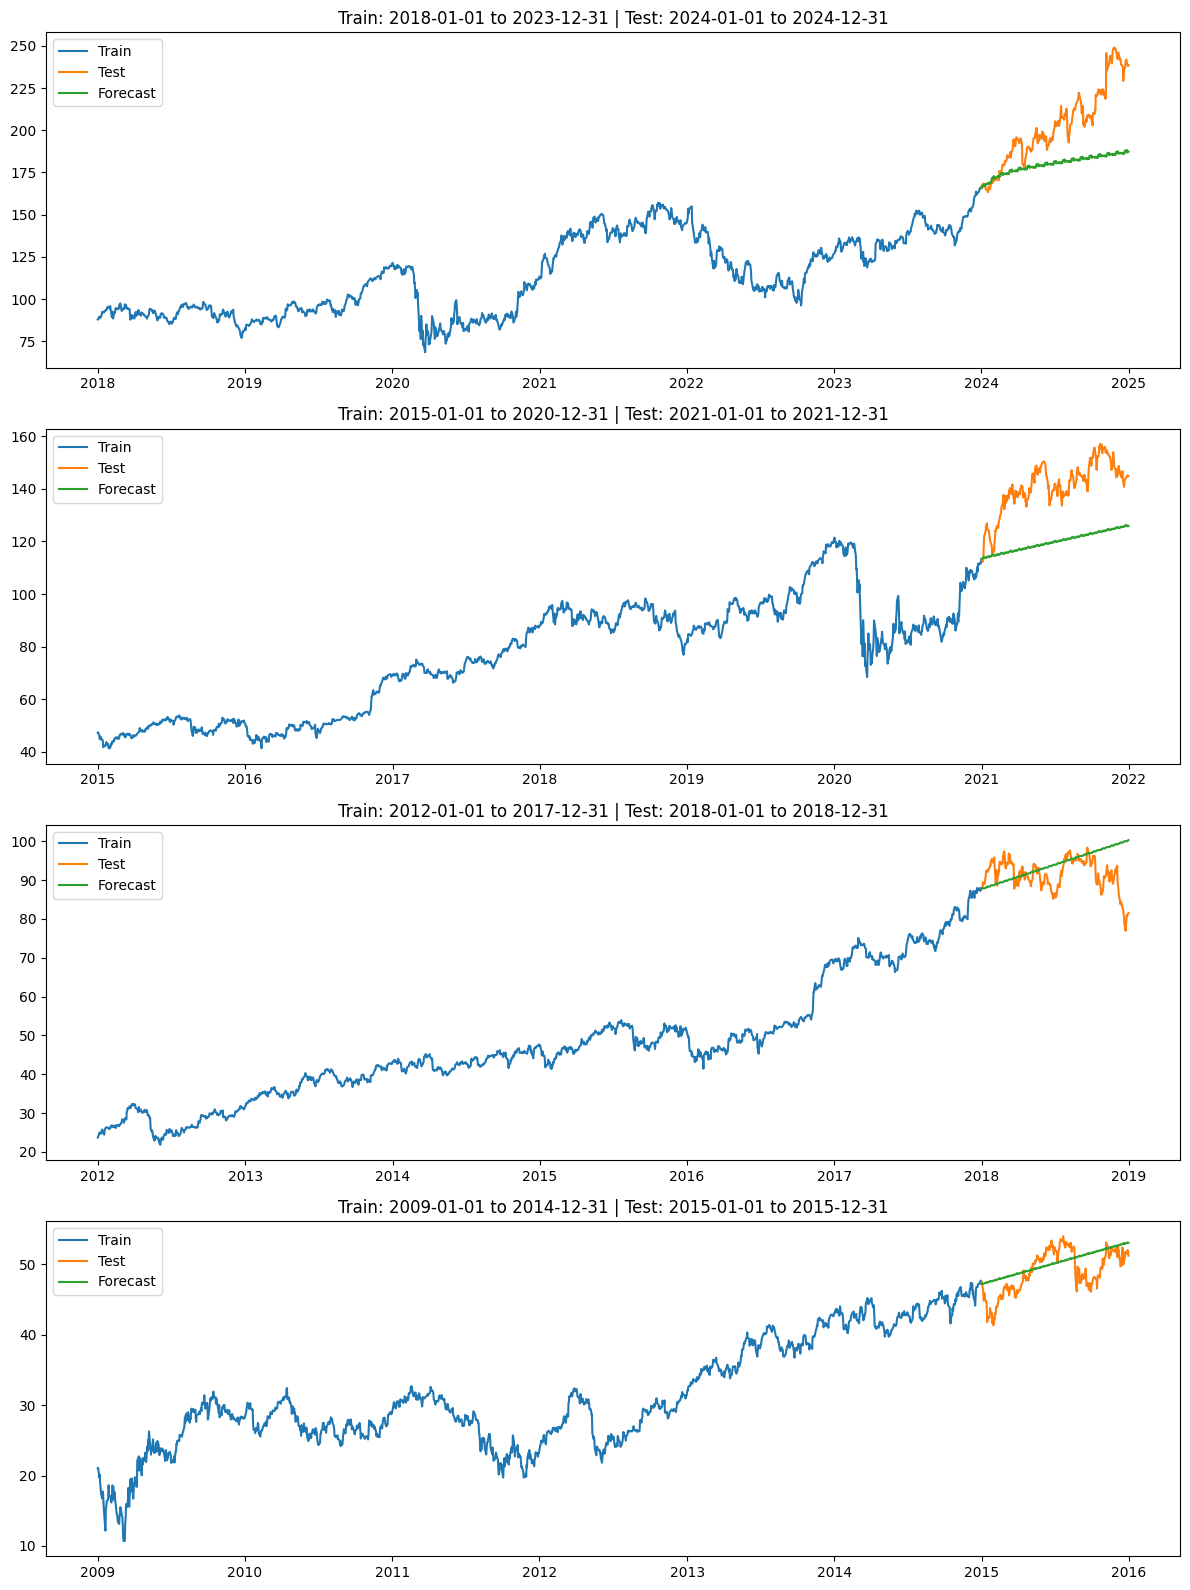


Average Metrics Over 4 Periods:
RMSE: 15.04
MAE: 12.77
MAPE: 0.0881
R2: -1.65


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc  # Added for garbage collection
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from itertools import product
import warnings
warnings.filterwarnings('ignore')

# Load and preprocess data
df = pd.read_csv('JPM.csv', skiprows=3, header=None)
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)
df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

# Define sliding windows
periods = [
    ('2018-01-01', '2023-12-31', '2024-01-01', '2024-12-31'),
    ('2015-01-01', '2020-12-31', '2021-01-01', '2021-12-31'),
    ('2012-01-01', '2017-12-31', '2018-01-01', '2018-12-31'),
    ('2009-01-01', '2014-12-31', '2015-01-01', '2015-12-31')
]

# Hyperparameter grids
p = q = range(1, 3)  # 1-2
P = Q = range(0, 2)  # 0-1
m_values = [22]      # Trading days per month

rmse_list, mae_list, mape_list, r2_list = [], [], [], []

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 16), sharex=False)

for i, (train_start, train_end, test_start, test_end) in enumerate(periods):
    train = df.loc[train_start:train_end]['Close']
    test = df.loc[test_start:test_end]['Close']

    best_rmse = float('inf')
    best_order = None
    best_seasonal_order = None
    best_forecast = None

    print(f"\nGrid search for period: Train {train_start}–{train_end}, Test {test_start}–{test_end}")

    for order in product(p, [1], q):  # Fix d=1
        for seasonal_order in product(P, [1], Q, m_values):  # Fix D=1
            try:
                model = SARIMAX(train, order=order, seasonal_order=seasonal_order,
                                enforce_stationarity=False, enforce_invertibility=False)
                results = model.fit(disp=False)
                forecast = results.forecast(steps=len(test))
                rmse = np.sqrt(mean_squared_error(test, forecast))

                if rmse < best_rmse:
                    best_rmse = rmse
                    best_order = order
                    best_seasonal_order = seasonal_order
                    best_forecast = forecast

                # Free memory
                del model, results, forecast
                gc.collect()

            except:
                continue

    # Final model with best params
    print(f"Best SARIMA order={best_order}, seasonal_order={best_seasonal_order}, RMSE={best_rmse:.2f}")

    model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order,
                    enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=False)
    forecast = results.forecast(steps=len(test))

    # Metrics
    rmse = np.sqrt(mean_squared_error(test, forecast))
    mae = mean_absolute_error(test, forecast)
    mape = mean_absolute_percentage_error(test, forecast)
    r2 = r2_score(test, forecast)

    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)
    r2_list.append(r2)

    print(f"Final Metrics - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.4f}, R2: {r2:.2f}")

    # Plot
    ax = axes[i]
    ax.plot(train.index, train, label='Train')
    ax.plot(test.index, test, label='Test')
    ax.plot(test.index, forecast, label='Forecast')
    ax.set_title(f'Train: {train_start} to {train_end} | Test: {test_start} to {test_end}')
    ax.legend()

plt.tight_layout()
plt.show()

# Print average metrics
print('\nAverage Metrics Over 4 Periods:')
print(f'RMSE: {np.mean(rmse_list):.2f}')
print(f'MAE: {np.mean(mae_list):.2f}')
print(f'MAPE: {np.mean(mape_list):.4f}')
print(f'R2: {np.mean(r2_list):.2f}')


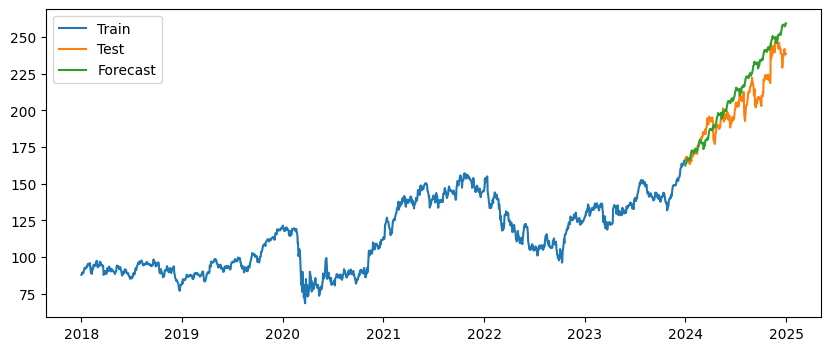

RMSE: 12.95, MAE: 10.42 MAPE: 0.05 R2: 0.67


In [ ]:
# Read CSV skipping the first two metadata rows
df = pd.read_csv('JPM.csv', skiprows=3, header=None)

# Set proper column names
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)

# Ensure daily frequency and interpolate missing Close values
df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

train = df.loc['2018-01-01':'2023-12-31']['Close']
test = df.loc['2024-01-01':'2024-12-31']['Close']

model = SARIMAX(train, order=(2,1,1), seasonal_order=(1,1,0,66), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

forecast = results.forecast(steps=len(test))
plt.figure(figsize=(10,4))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()

# Metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mape = mean_absolute_percentage_error(test, forecast)
r2 = r2_score(test, forecast)
print(f'RMSE: {rmse:.2f}, MAE: {mae:.2f}', f'MAPE: {mape:.2f}', f'R2: {r2:.2f}')

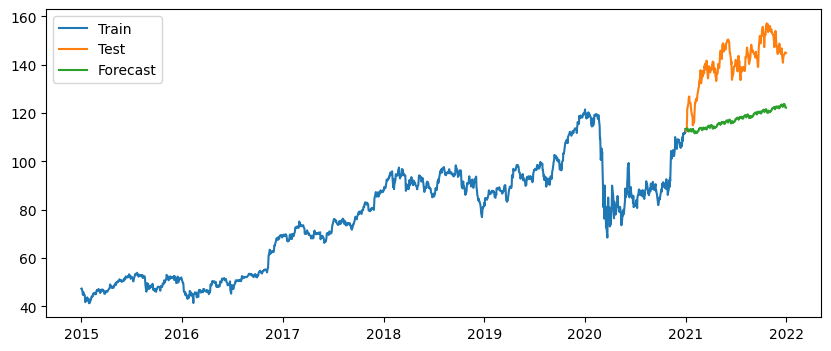

RMSE: 24.68, MAE: 23.56 MAPE: 0.16 R2: -5.70


In [ ]:
# Read CSV skipping the first two metadata rows
df = pd.read_csv('JPM.csv', skiprows=3, header=None)

# Set proper column names
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)

# Ensure daily frequency and interpolate missing Close values
df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

train = df.loc['2015-01-01':'2020-12-31']['Close']
test = df.loc['2021-01-01':'2021-12-31']['Close']

model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,66), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

forecast = results.forecast(steps=len(test))
plt.figure(figsize=(10,4))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()

# Metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mape = mean_absolute_percentage_error(test, forecast)
r2 = r2_score(test, forecast)
print(f'RMSE: {rmse:.2f}, MAE: {mae:.2f}', f'MAPE: {mape:.2f}', f'R2: {r2:.2f}')

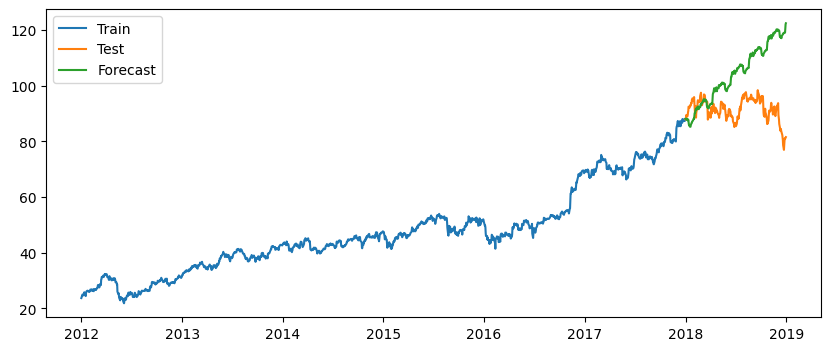

RMSE: 17.34, MAE: 13.94 MAPE: 0.16 R2: -18.45


In [ ]:
# Read CSV skipping the first two metadata rows
df = pd.read_csv('JPM.csv', skiprows=3, header=None)

# Set proper column names
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)

# Ensure daily frequency and interpolate missing Close values
df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

train = df.loc['2012-01-01':'2017-12-31']['Close']
test = df.loc['2018-01-01':'2018-12-31']['Close']

model = SARIMAX(train, order=(1,1,1), seasonal_order=(0,1,1,66), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

forecast = results.forecast(steps=len(test))
plt.figure(figsize=(10,4))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()

# Metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mape = mean_absolute_percentage_error(test, forecast)
r2 = r2_score(test, forecast)
print(f'RMSE: {rmse:.2f}, MAE: {mae:.2f}', f'MAPE: {mape:.2f}', f'R2: {r2:.2f}')

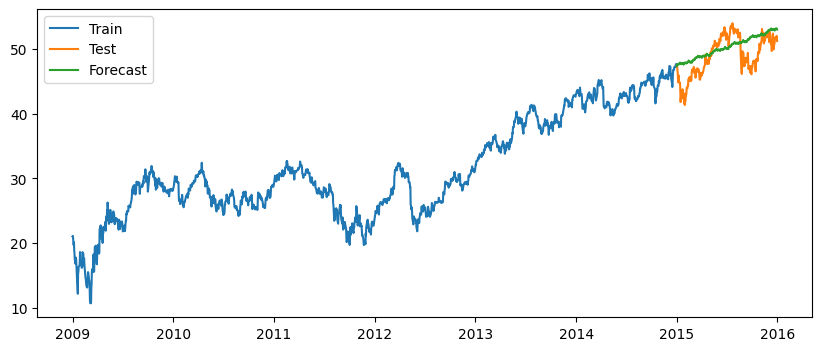

RMSE: 2.66, MAE: 2.25 MAPE: 0.05 R2: 0.22


In [ ]:
# Read CSV skipping the first two metadata rows
df = pd.read_csv('JPM.csv', skiprows=3, header=None)

# Set proper column names
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)

# Ensure daily frequency and interpolate missing Close values
df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

train = df.loc['2009-01-01':'2014-12-31']['Close']
test = df.loc['2015-01-01':'2015-12-31']['Close']

model = SARIMAX(train, order=(2,1,1), seasonal_order=(0,1,1,66), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

forecast = results.forecast(steps=len(test))
plt.figure(figsize=(10,4))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()

# Metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mape = mean_absolute_percentage_error(test, forecast)
r2 = r2_score(test, forecast)
print(f'RMSE: {rmse:.2f}, MAE: {mae:.2f}', f'MAPE: {mape:.2f}', f'R2: {r2:.2f}')

Period Train:2018-01-01 to 2023-12-31, Test:2024-01-01 to 2024-12-31
  RMSE: 20.60, MAE: 18.09, MAPE: 0.0865, R2: 0.36

Period Train:2015-01-01 to 2020-12-31, Test:2021-01-01 to 2021-12-31
  RMSE: 15.36, MAE: 13.64, MAPE: 0.1022, R2: -0.13

Period Train:2012-01-01 to 2017-12-31, Test:2018-01-01 to 2018-12-31
  RMSE: 4.96, MAE: 3.83, MAPE: 0.0818, R2: 0.01

Period Train:2009-01-01 to 2014-12-31, Test:2015-01-01 to 2015-12-31
  RMSE: 2.35, MAE: 2.08, MAPE: 0.0766, R2: -0.94



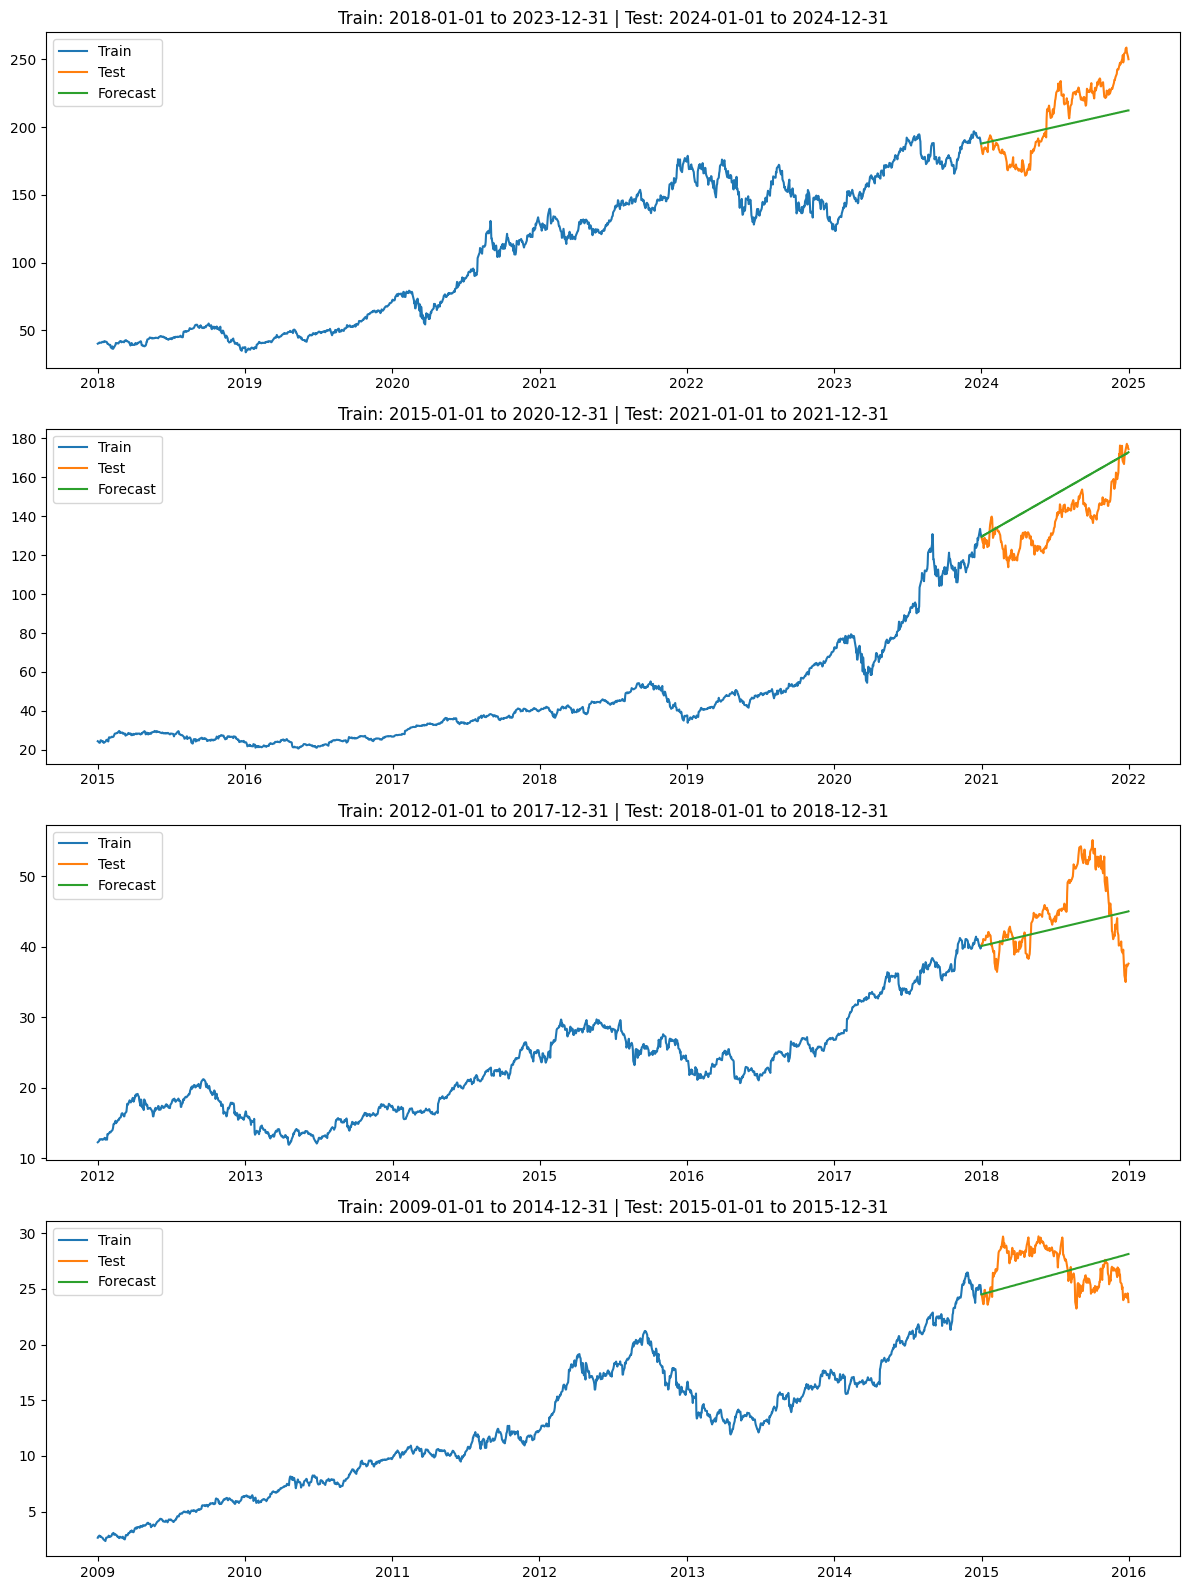

Average Metrics Over 4 Periods:
RMSE: 10.82
MAE: 9.41
MAPE: 0.0868
R2: -0.18


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Read CSV skipping the first two metadata rows
df = pd.read_csv('AAPL.csv', skiprows=3, header=None)
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)

df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

periods = [
    ('2018-01-01', '2023-12-31', '2024-01-01', '2024-12-31'),
    ('2015-01-01', '2020-12-31', '2021-01-01', '2021-12-31'),
    ('2012-01-01', '2017-12-31', '2018-01-01', '2018-12-31'),
    ('2009-01-01', '2014-12-31', '2015-01-01', '2015-12-31')
]

rmse_list, mae_list, mape_list, r2_list = [], [], [], []

# Prepare subplots: 4 rows, 1 col
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 16), sharex=False)

for i, (train_start, train_end, test_start, test_end) in enumerate(periods):
    train = df.loc[train_start:train_end]['Close']
    test = df.loc[test_start:test_end]['Close']

    model = SARIMAX(train, order=(2,1,3), seasonal_order=(1,1,1,5),
                    enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=False)

    forecast = results.forecast(steps=len(test))

    rmse = np.sqrt(mean_squared_error(test, forecast))
    mae = mean_absolute_error(test, forecast)
    mape = mean_absolute_percentage_error(test, forecast)
    r2 = r2_score(test, forecast)

    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)
    r2_list.append(r2)

    print(f'Period Train:{train_start} to {train_end}, Test:{test_start} to {test_end}')
    print(f'  RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.4f}, R2: {r2:.2f}\n')

    ax = axes[i]
    ax.plot(train.index, train, label='Train')
    ax.plot(test.index, test, label='Test')
    ax.plot(test.index, forecast, label='Forecast')
    ax.set_title(f'Train: {train_start} to {train_end} | Test: {test_start} to {test_end}')
    ax.legend()

plt.tight_layout()
plt.show()

print('Average Metrics Over 4 Periods:')
print(f'RMSE: {np.mean(rmse_list):.2f}')
print(f'MAE: {np.mean(mae_list):.2f}')
print(f'MAPE: {np.mean(mape_list):.4f}')
print(f'R2: {np.mean(r2_list):.2f}')



Grid search for period: Train 2018-01-01–2023-12-31, Test 2024-01-01–2024-12-31
Best SARIMA order=(2, 1, 2), seasonal_order=(0, 1, 1, 22), RMSE=20.21
Final Metrics - RMSE: 20.21, MAE: 17.84, MAPE: 0.0859, R2: 0.38

Grid search for period: Train 2015-01-01–2020-12-31, Test 2021-01-01–2021-12-31
Best SARIMA order=(0, 1, 2), seasonal_order=(0, 1, 1, 22), RMSE=10.82
Final Metrics - RMSE: 10.82, MAE: 9.02, MAPE: 0.0679, R2: 0.44

Grid search for period: Train 2012-01-01–2017-12-31, Test 2018-01-01–2018-12-31
Best SARIMA order=(2, 1, 2), seasonal_order=(1, 1, 1, 22), RMSE=4.55
Final Metrics - RMSE: 4.55, MAE: 3.46, MAPE: 0.0759, R2: 0.16

Grid search for period: Train 2009-01-01–2014-12-31, Test 2015-01-01–2015-12-31
Best SARIMA order=(0, 1, 0), seasonal_order=(1, 1, 1, 5), RMSE=2.33
Final Metrics - RMSE: 2.33, MAE: 2.08, MAPE: 0.0766, R2: -0.92


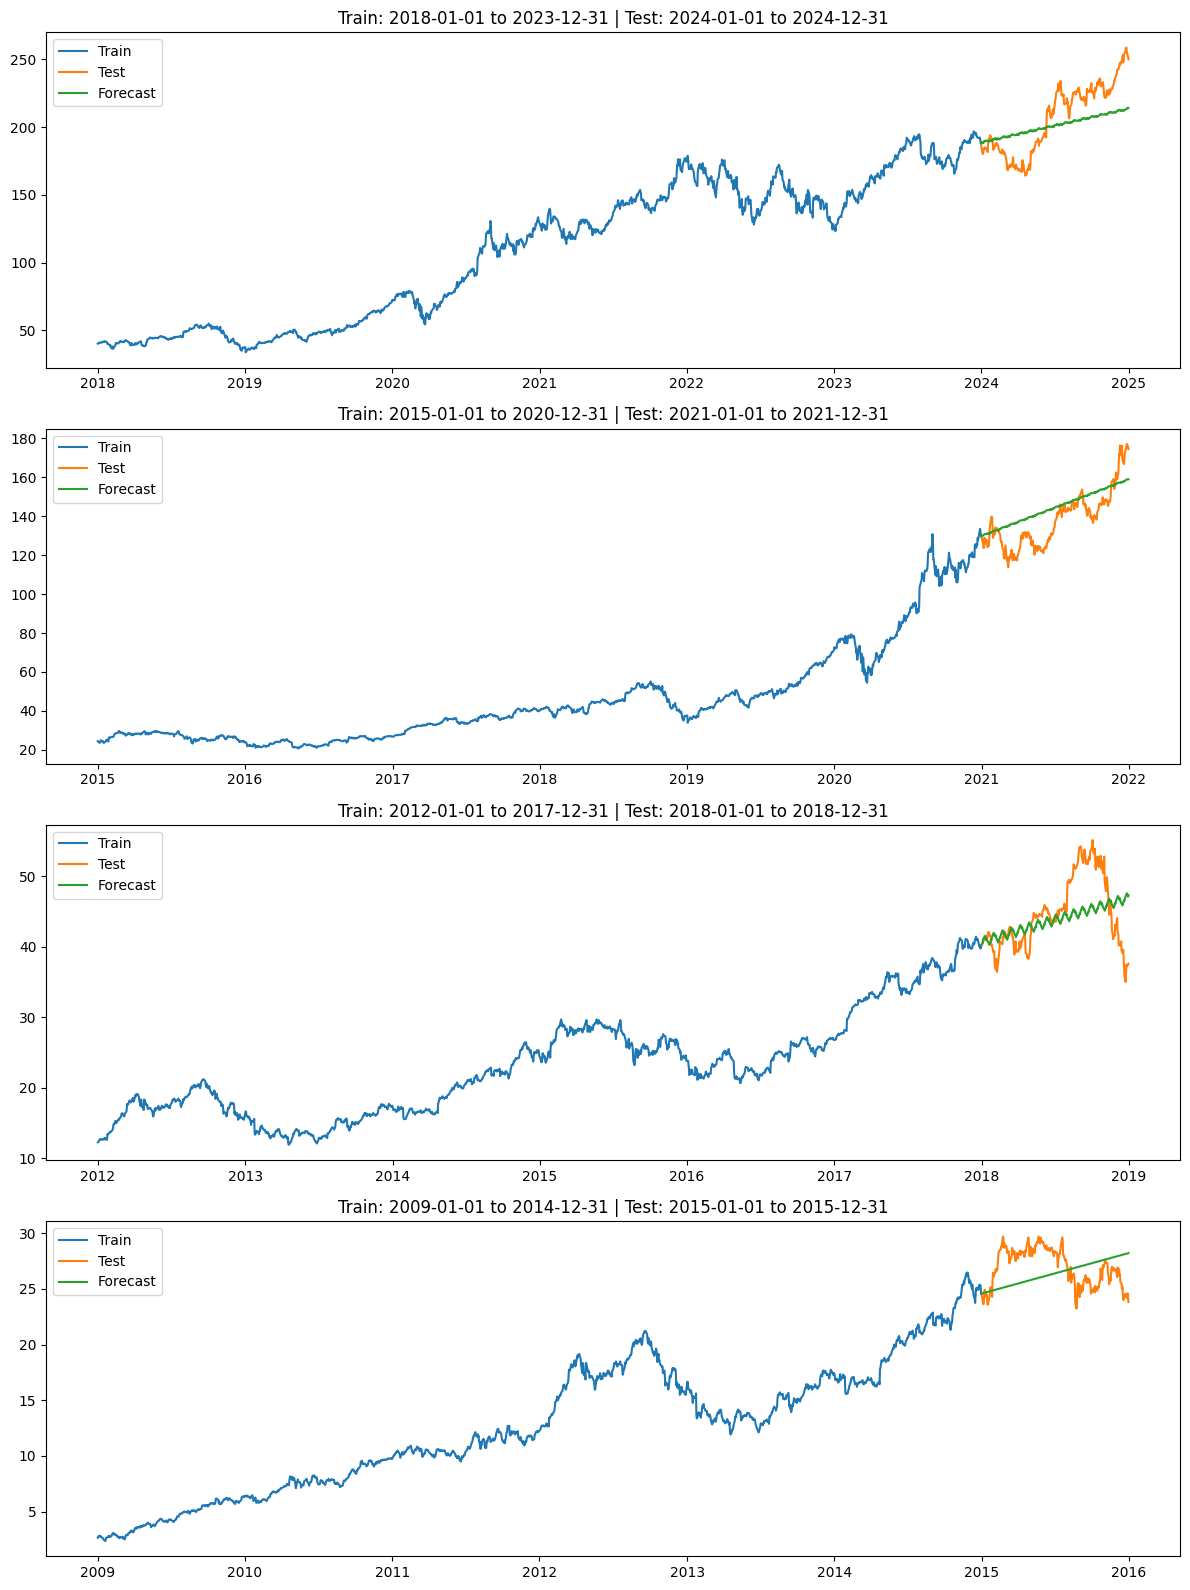


Average Metrics Over 4 Periods:
RMSE: 9.48
MAE: 8.10
MAPE: 0.0766
R2: 0.02


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from itertools import product
import warnings
warnings.filterwarnings('ignore')

# Load and preprocess data
df = pd.read_csv('AAPL.csv', skiprows=3, header=None)
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)
df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

# Define sliding windows
periods = [
    ('2018-01-01', '2023-12-31', '2024-01-01', '2024-12-31'),
    ('2015-01-01', '2020-12-31', '2021-01-01', '2021-12-31'),
    ('2012-01-01', '2017-12-31', '2018-01-01', '2018-12-31'),
    ('2009-01-01', '2014-12-31', '2015-01-01', '2015-12-31')
]

# Hyperparameter grids
p = d = q = range(0, 3)
P = D = Q = range(0, 2)
m_values = [5, 22]  # Try both weekly and trading-week seasonality

rmse_list, mae_list, mape_list, r2_list = [], [], [], []

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 16), sharex=False)

for i, (train_start, train_end, test_start, test_end) in enumerate(periods):
    train = df.loc[train_start:train_end]['Close']
    test = df.loc[test_start:test_end]['Close']

    best_rmse = float('inf')
    best_order = None
    best_seasonal_order = None
    best_forecast = None

    print(f"\nGrid search for period: Train {train_start}–{train_end}, Test {test_start}–{test_end}")

    for order in product(p, [1], q):  # Fix d=1
        for seasonal_order in product(P, [1], Q, m_values):  # Fix D=1
            try:
                model = SARIMAX(train, order=order, seasonal_order=seasonal_order,
                                enforce_stationarity=False, enforce_invertibility=False)
                results = model.fit(disp=False)
                forecast = results.forecast(steps=len(test))
                rmse = np.sqrt(mean_squared_error(test, forecast))

                if rmse < best_rmse:
                    best_rmse = rmse
                    best_order = order
                    best_seasonal_order = seasonal_order
                    best_forecast = forecast
            except:
                continue

    # Final model with best params
    print(f"Best SARIMA order={best_order}, seasonal_order={best_seasonal_order}, RMSE={best_rmse:.2f}")

    model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order,
                    enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=False)
    forecast = results.forecast(steps=len(test))

    # Metrics
    rmse = np.sqrt(mean_squared_error(test, forecast))
    mae = mean_absolute_error(test, forecast)
    mape = mean_absolute_percentage_error(test, forecast)
    r2 = r2_score(test, forecast)

    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)
    r2_list.append(r2)

    print(f"Final Metrics - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.4f}, R2: {r2:.2f}")

    # Plot
    ax = axes[i]
    ax.plot(train.index, train, label='Train')
    ax.plot(test.index, test, label='Test')
    ax.plot(test.index, forecast, label='Forecast')
    ax.set_title(f'Train: {train_start} to {train_end} | Test: {test_start} to {test_end}')
    ax.legend()

plt.tight_layout()
plt.show()

# Print average metrics
print('\nAverage Metrics Over 4 Periods:')
print(f'RMSE: {np.mean(rmse_list):.2f}')
print(f'MAE: {np.mean(mae_list):.2f}')
print(f'MAPE: {np.mean(mape_list):.4f}')
print(f'R2: {np.mean(r2_list):.2f}')


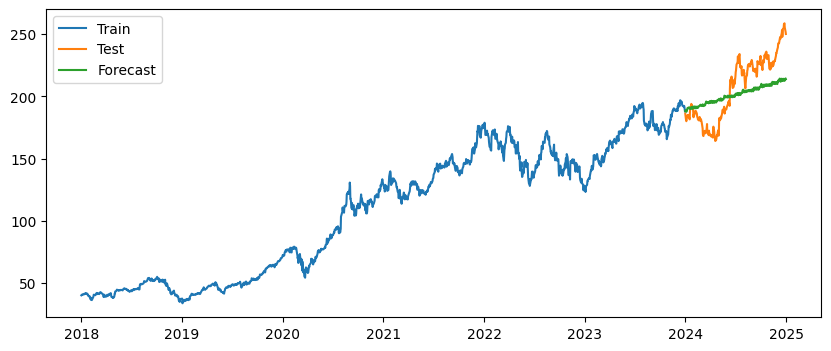

RMSE: 20.18, MAE: 17.84 MAPE: 0.09 R2: 0.38


In [ ]:
# Read CSV skipping the first two metadata rows
df = pd.read_csv('AAPL.csv', skiprows=3, header=None)

# Set proper column names
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)

# Ensure daily frequency and interpolate missing Close values
df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

train = df.loc['2018-01-01':'2023-12-31']['Close']
test = df.loc['2024-01-01':'2024-12-31']['Close']

model = SARIMAX(train, order=(2,1,2), seasonal_order=(0,1,1,66), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

forecast = results.forecast(steps=len(test))
plt.figure(figsize=(10,4))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()

# Metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mape = mean_absolute_percentage_error(test, forecast)
r2 = r2_score(test, forecast)
print(f'RMSE: {rmse:.2f}, MAE: {mae:.2f}', f'MAPE: {mape:.2f}', f'R2: {r2:.2f}')

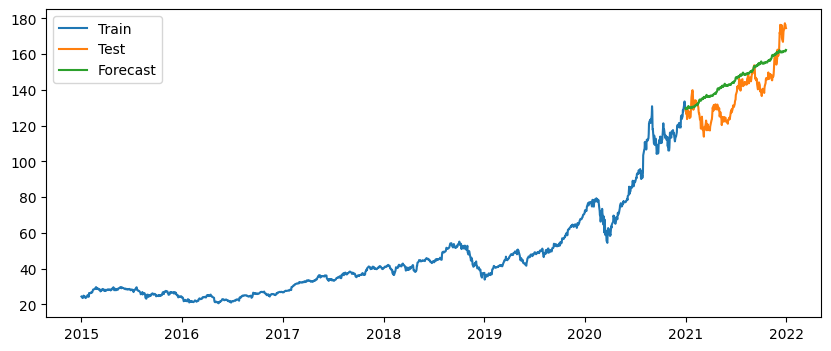

RMSE: 11.36, MAE: 9.68 MAPE: 0.07 R2: 0.38


In [ ]:
# Read CSV skipping the first two metadata rows
df = pd.read_csv('AAPL.csv', skiprows=3, header=None)

# Set proper column names
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)

# Ensure daily frequency and interpolate missing Close values
df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

train = df.loc['2015-01-01':'2020-12-31']['Close']
test = df.loc['2021-01-01':'2021-12-31']['Close']

model = SARIMAX(train, order=(0,1,2), seasonal_order=(0,1,1,66), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

forecast = results.forecast(steps=len(test))
plt.figure(figsize=(10,4))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()

# Metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mape = mean_absolute_percentage_error(test, forecast)
r2 = r2_score(test, forecast)
print(f'RMSE: {rmse:.2f}, MAE: {mae:.2f}', f'MAPE: {mape:.2f}', f'R2: {r2:.2f}')

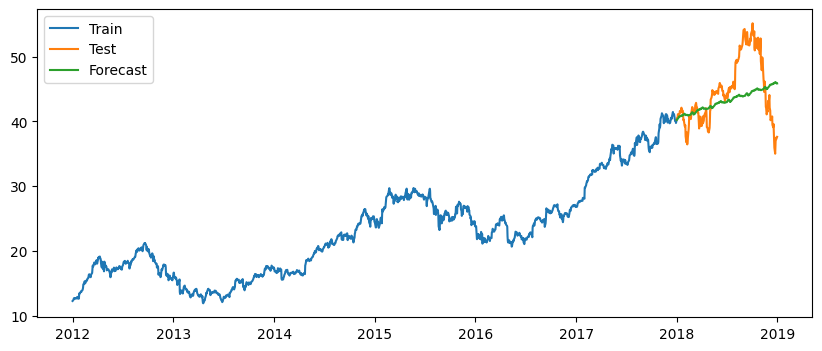

RMSE: 4.73, MAE: 3.62 MAPE: 0.08 R2: 0.10


In [ ]:
# Read CSV skipping the first two metadata rows
df = pd.read_csv('AAPL.csv', skiprows=3, header=None)

# Set proper column names
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)

# Ensure daily frequency and interpolate missing Close values
df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

train = df.loc['2012-01-01':'2017-12-31']['Close']
test = df.loc['2018-01-01':'2018-12-31']['Close']

model = SARIMAX(train, order=(2,1,2), seasonal_order=(1,1,1,66), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

forecast = results.forecast(steps=len(test))
plt.figure(figsize=(10,4))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()

# Metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mape = mean_absolute_percentage_error(test, forecast)
r2 = r2_score(test, forecast)
print(f'RMSE: {rmse:.2f}, MAE: {mae:.2f}', f'MAPE: {mape:.2f}', f'R2: {r2:.2f}')

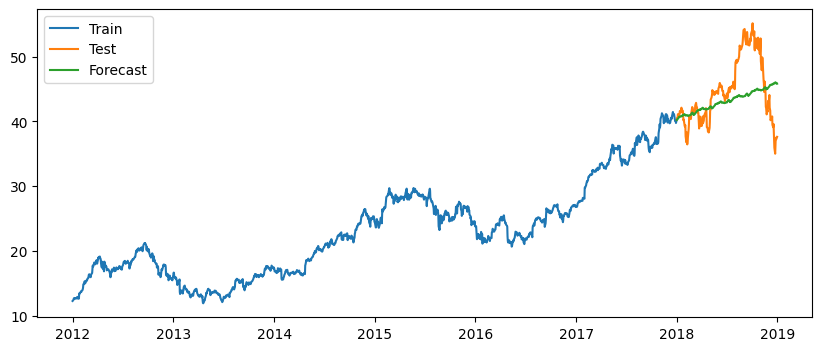

RMSE: 4.74, MAE: 3.64 MAPE: 0.08 R2: 0.09


In [ ]:
# Read CSV skipping the first two metadata rows
df = pd.read_csv('AAPL.csv', skiprows=3, header=None)

# Set proper column names
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)

# Ensure daily frequency and interpolate missing Close values
df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

train = df.loc['2012-01-01':'2017-12-31']['Close']
test = df.loc['2018-01-01':'2018-12-31']['Close']

model = SARIMAX(train, order=(0,1,0), seasonal_order=(1,1,1,66), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

forecast = results.forecast(steps=len(test))
plt.figure(figsize=(10,4))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()

# Metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mape = mean_absolute_percentage_error(test, forecast)
r2 = r2_score(test, forecast)
print(f'RMSE: {rmse:.2f}, MAE: {mae:.2f}', f'MAPE: {mape:.2f}', f'R2: {r2:.2f}')

Period Train:2018-01-01 to 2023-12-31, Test:2024-01-01 to 2024-12-31
  RMSE: 60.37, MAE: 55.03, MAPE: 0.4770, R2: -4.03

Period Train:2015-01-01 to 2020-12-31, Test:2021-01-01 to 2021-12-31
  RMSE: 7.19, MAE: 5.19, MAPE: 0.2194, R2: -0.50

Period Train:2012-01-01 to 2017-12-31, Test:2018-01-01 to 2018-12-31
  RMSE: 1.28, MAE: 0.88, MAPE: 0.1930, R2: -0.91

Period Train:2009-01-01 to 2014-12-31, Test:2015-01-01 to 2015-12-31
  RMSE: 0.11, MAE: 0.07, MAPE: 0.1048, R2: -0.10



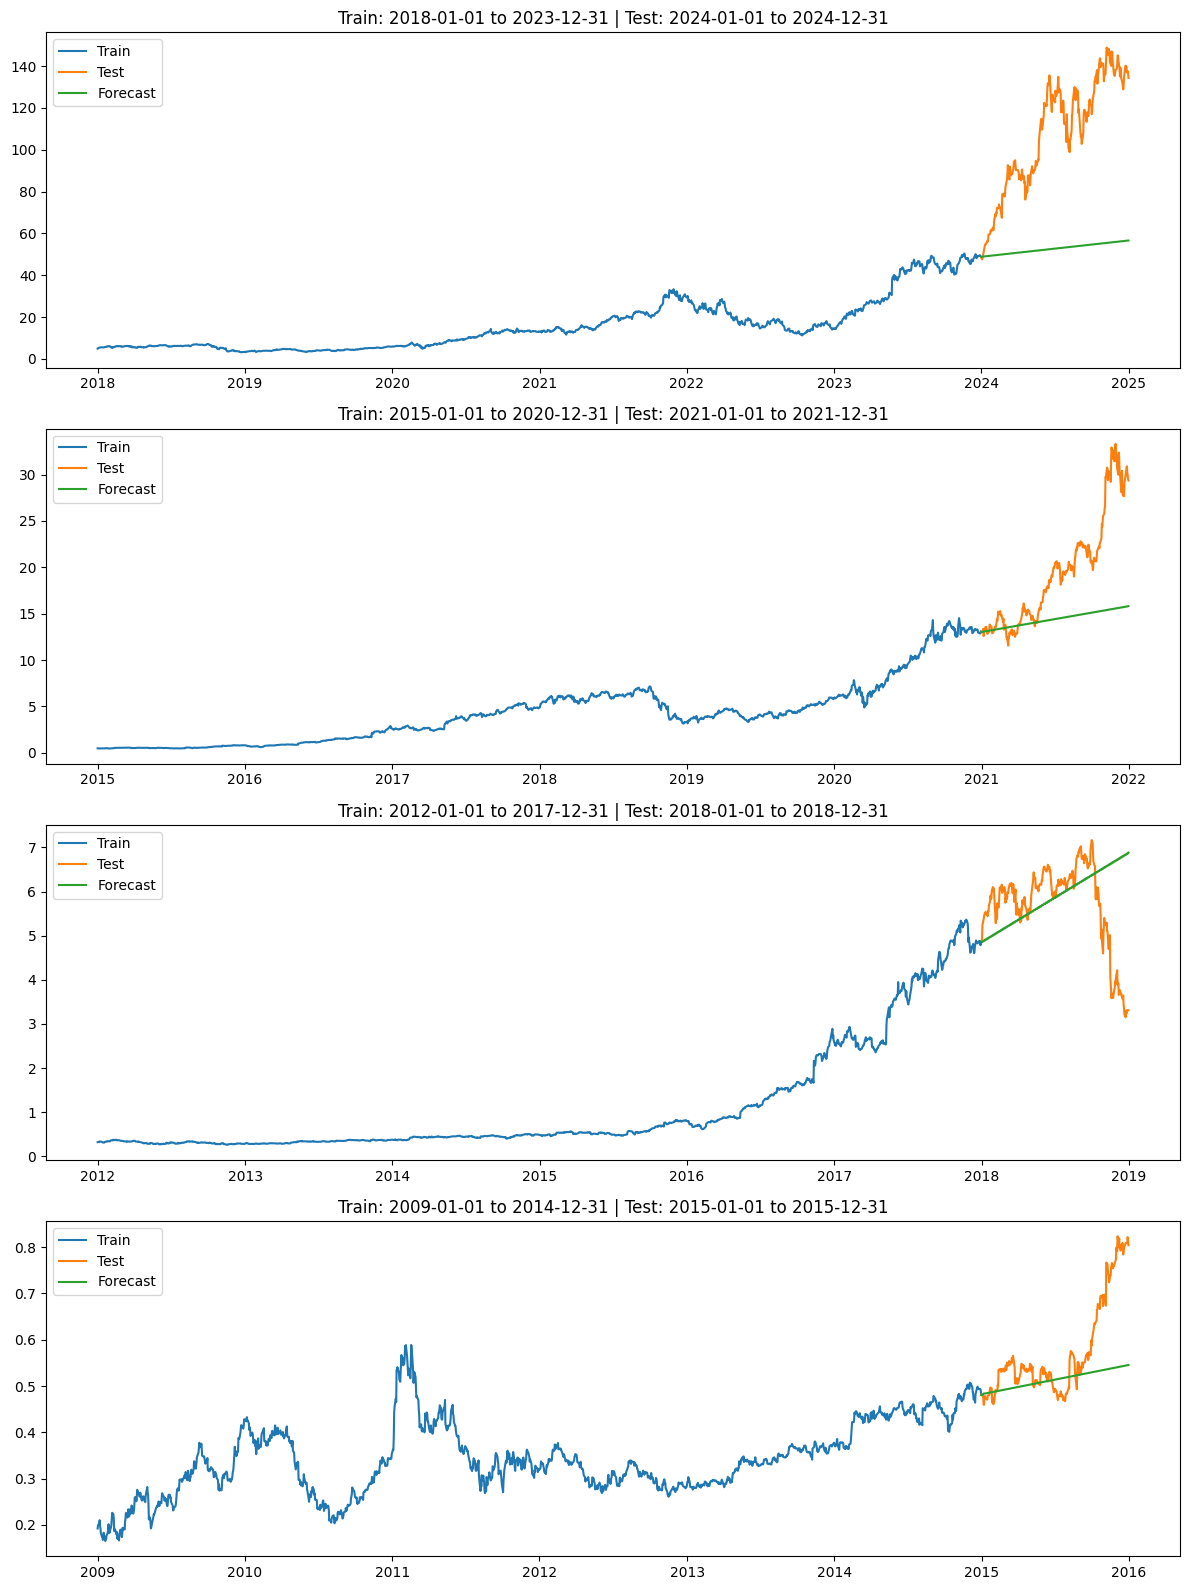

Average Metrics Over 4 Periods:
RMSE: 17.24
MAE: 15.29
MAPE: 0.2485
R2: -1.38


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Read CSV skipping the first two metadata rows
df = pd.read_csv('NVDA.csv', skiprows=3, header=None)
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)

df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

periods = [
    ('2018-01-01', '2023-12-31', '2024-01-01', '2024-12-31'),
    ('2015-01-01', '2020-12-31', '2021-01-01', '2021-12-31'),
    ('2012-01-01', '2017-12-31', '2018-01-01', '2018-12-31'),
    ('2009-01-01', '2014-12-31', '2015-01-01', '2015-12-31')
]

rmse_list, mae_list, mape_list, r2_list = [], [], [], []

# Prepare subplots: 4 rows, 1 col
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 16), sharex=False)

for i, (train_start, train_end, test_start, test_end) in enumerate(periods):
    train = df.loc[train_start:train_end]['Close']
    test = df.loc[test_start:test_end]['Close']

    model = SARIMAX(train, order=(2,1,3), seasonal_order=(1,1,1,5),
                    enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=False)

    forecast = results.forecast(steps=len(test))

    rmse = np.sqrt(mean_squared_error(test, forecast))
    mae = mean_absolute_error(test, forecast)
    mape = mean_absolute_percentage_error(test, forecast)
    r2 = r2_score(test, forecast)

    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)
    r2_list.append(r2)

    print(f'Period Train:{train_start} to {train_end}, Test:{test_start} to {test_end}')
    print(f'  RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.4f}, R2: {r2:.2f}\n')

    ax = axes[i]
    ax.plot(train.index, train, label='Train')
    ax.plot(test.index, test, label='Test')
    ax.plot(test.index, forecast, label='Forecast')
    ax.set_title(f'Train: {train_start} to {train_end} | Test: {test_start} to {test_end}')
    ax.legend()

plt.tight_layout()
plt.show()

print('Average Metrics Over 4 Periods:')
print(f'RMSE: {np.mean(rmse_list):.2f}')
print(f'MAE: {np.mean(mae_list):.2f}')
print(f'MAPE: {np.mean(mape_list):.4f}')
print(f'R2: {np.mean(r2_list):.2f}')



Grid search for period: Train 2018-01-01–2023-12-31, Test 2024-01-01–2024-12-31
Best SARIMA order=(0, 1, 1), seasonal_order=(0, 1, 0, 22), RMSE=48.74
Final Metrics - RMSE: 48.74, MAE: 44.51, MAPE: 0.3868, R2: -2.28

Grid search for period: Train 2015-01-01–2020-12-31, Test 2021-01-01–2021-12-31
Best SARIMA order=(1, 1, 1), seasonal_order=(0, 1, 0, 5), RMSE=4.31
Final Metrics - RMSE: 4.31, MAE: 2.92, MAPE: 0.1258, R2: 0.46

Grid search for period: Train 2012-01-01–2017-12-31, Test 2018-01-01–2018-12-31
Best SARIMA order=(2, 1, 2), seasonal_order=(0, 1, 1, 22), RMSE=1.15
Final Metrics - RMSE: 1.15, MAE: 0.94, MAPE: 0.1907, R2: -0.53

Grid search for period: Train 2009-01-01–2014-12-31, Test 2015-01-01–2015-12-31
Best SARIMA order=(2, 1, 2), seasonal_order=(0, 1, 1, 5), RMSE=0.09
Final Metrics - RMSE: 0.09, MAE: 0.06, MAPE: 0.0917, R2: 0.18


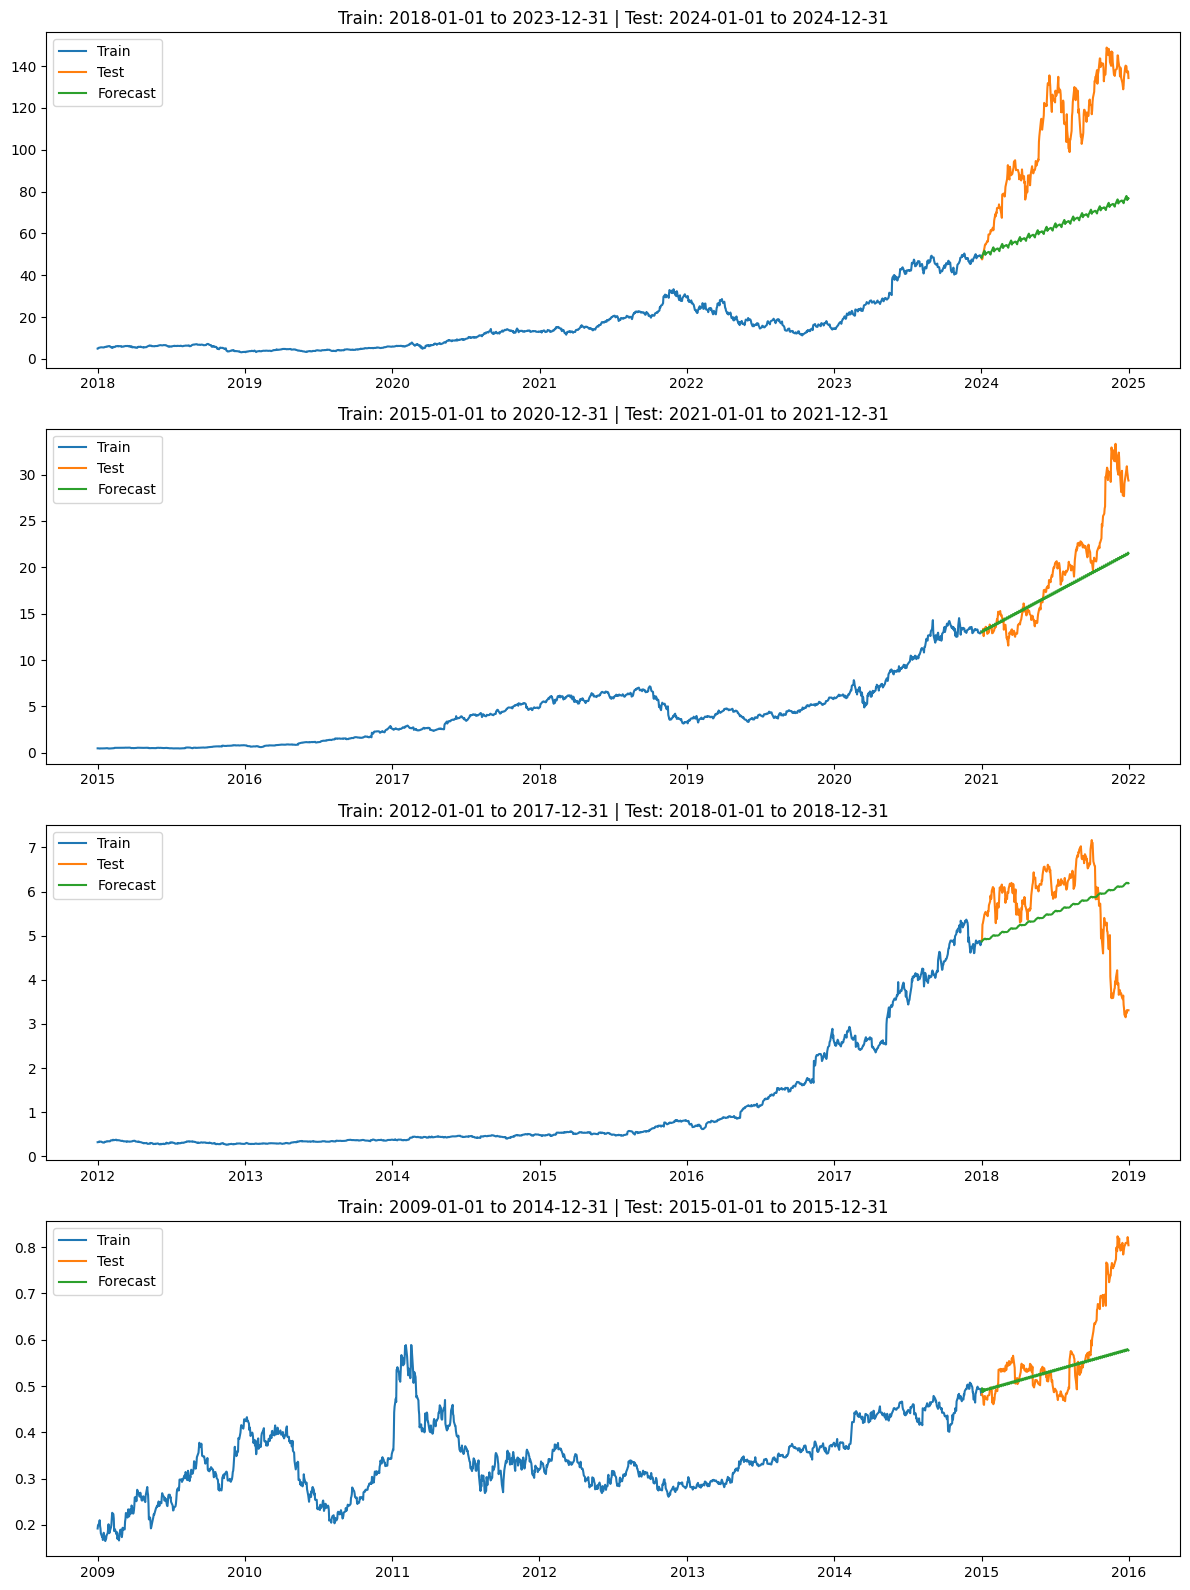


Average Metrics Over 4 Periods:
RMSE: 13.57
MAE: 12.11
MAPE: 0.1988
R2: -0.54


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from itertools import product
import warnings
warnings.filterwarnings('ignore')

# Load and preprocess data
df = pd.read_csv('NVDA.csv', skiprows=3, header=None)
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)
df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

# Define sliding windows
periods = [
    ('2018-01-01', '2023-12-31', '2024-01-01', '2024-12-31'),
    ('2015-01-01', '2020-12-31', '2021-01-01', '2021-12-31'),
    ('2012-01-01', '2017-12-31', '2018-01-01', '2018-12-31'),
    ('2009-01-01', '2014-12-31', '2015-01-01', '2015-12-31')
]

# Hyperparameter grids
p = d = q = range(0, 3)
P = D = Q = range(0, 2)
m_values = [5, 22]  # Try both weekly and trading-week seasonality

rmse_list, mae_list, mape_list, r2_list = [], [], [], []

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 16), sharex=False)

for i, (train_start, train_end, test_start, test_end) in enumerate(periods):
    train = df.loc[train_start:train_end]['Close']
    test = df.loc[test_start:test_end]['Close']

    best_rmse = float('inf')
    best_order = None
    best_seasonal_order = None
    best_forecast = None

    print(f"\nGrid search for period: Train {train_start}–{train_end}, Test {test_start}–{test_end}")

    for order in product(p, [1], q):  # Fix d=1
        for seasonal_order in product(P, [1], Q, m_values):  # Fix D=1
            try:
                model = SARIMAX(train, order=order, seasonal_order=seasonal_order,
                                enforce_stationarity=False, enforce_invertibility=False)
                results = model.fit(disp=False)
                forecast = results.forecast(steps=len(test))
                rmse = np.sqrt(mean_squared_error(test, forecast))

                if rmse < best_rmse:
                    best_rmse = rmse
                    best_order = order
                    best_seasonal_order = seasonal_order
                    best_forecast = forecast
            except:
                continue

    # Final model with best params
    print(f"Best SARIMA order={best_order}, seasonal_order={best_seasonal_order}, RMSE={best_rmse:.2f}")

    model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order,
                    enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=False)
    forecast = results.forecast(steps=len(test))

    # Metrics
    rmse = np.sqrt(mean_squared_error(test, forecast))
    mae = mean_absolute_error(test, forecast)
    mape = mean_absolute_percentage_error(test, forecast)
    r2 = r2_score(test, forecast)

    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)
    r2_list.append(r2)

    print(f"Final Metrics - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.4f}, R2: {r2:.2f}")

    # Plot
    ax = axes[i]
    ax.plot(train.index, train, label='Train')
    ax.plot(test.index, test, label='Test')
    ax.plot(test.index, forecast, label='Forecast')
    ax.set_title(f'Train: {train_start} to {train_end} | Test: {test_start} to {test_end}')
    ax.legend()

plt.tight_layout()
plt.show()

# Print average metrics
print('\nAverage Metrics Over 4 Periods:')
print(f'RMSE: {np.mean(rmse_list):.2f}')
print(f'MAE: {np.mean(mae_list):.2f}')
print(f'MAPE: {np.mean(mape_list):.4f}')
print(f'R2: {np.mean(r2_list):.2f}')


<ipython-input-4-54fd3f8fc865>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Close'].interpolate(method='time', inplace=True)


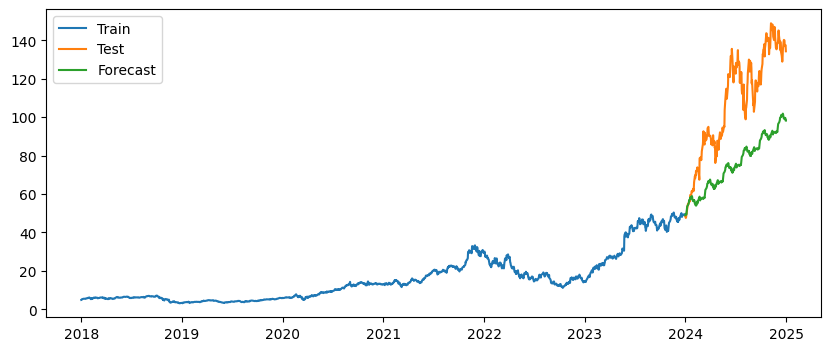

RMSE: 35.75, MAE: 32.25 MAPE: 0.28 R2: -0.77


In [4]:
# Read CSV skipping the first two metadata rows
df = pd.read_csv('NVDA.csv', skiprows=3, header=None)

# Set proper column names
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)

# Ensure daily frequency and interpolate missing Close values
df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

train = df.loc['2018-01-01':'2023-12-31']['Close']
test = df.loc['2024-01-01':'2024-12-31']['Close']

model = SARIMAX(train, order=(0,1,1), seasonal_order=(0,1,0,66), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

forecast = results.forecast(steps=len(test))
plt.figure(figsize=(10,4))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()

# Metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mape = mean_absolute_percentage_error(test, forecast)
r2 = r2_score(test, forecast)
print(f'RMSE: {rmse:.2f}, MAE: {mae:.2f}', f'MAPE: {mape:.2f}', f'R2: {r2:.2f}')

<ipython-input-5-cc22692b8622>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Close'].interpolate(method='time', inplace=True)


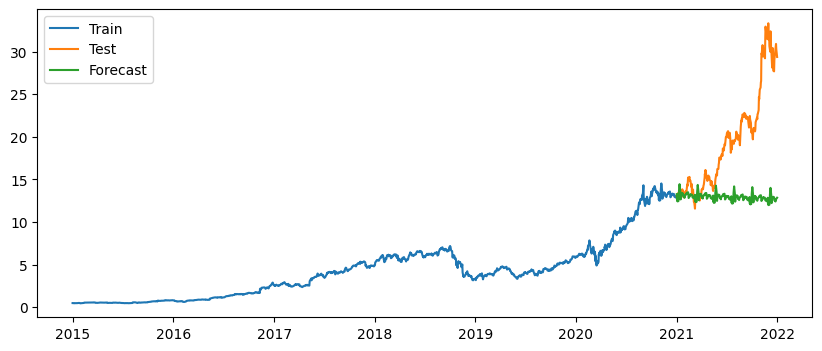

RMSE: 8.86, MAE: 6.61 MAPE: 0.28 R2: -1.28


In [5]:
# Read CSV skipping the first two metadata rows
df = pd.read_csv('NVDA.csv', skiprows=3, header=None)

# Set proper column names
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)

# Ensure daily frequency and interpolate missing Close values
df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

train = df.loc['2015-01-01':'2020-12-31']['Close']
test = df.loc['2021-01-01':'2021-12-31']['Close']

model = SARIMAX(train, order=(1,1,1), seasonal_order=(0,1,0,66), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

forecast = results.forecast(steps=len(test))
plt.figure(figsize=(10,4))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()

# Metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mape = mean_absolute_percentage_error(test, forecast)
r2 = r2_score(test, forecast)
print(f'RMSE: {rmse:.2f}, MAE: {mae:.2f}', f'MAPE: {mape:.2f}', f'R2: {r2:.2f}')

<ipython-input-6-1ffa503e1c6e>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Close'].interpolate(method='time', inplace=True)


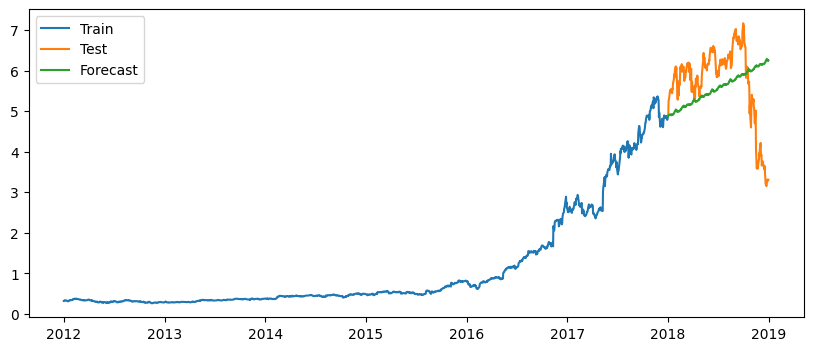

RMSE: 1.15, MAE: 0.93 MAPE: 0.19 R2: -0.55


In [6]:
# Read CSV skipping the first two metadata rows
df = pd.read_csv('NVDA.csv', skiprows=3, header=None)

# Set proper column names
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)

# Ensure daily frequency and interpolate missing Close values
df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

train = df.loc['2012-01-01':'2017-12-31']['Close']
test = df.loc['2018-01-01':'2018-12-31']['Close']

model = SARIMAX(train, order=(2,1,2), seasonal_order=(0,1,1,66), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

forecast = results.forecast(steps=len(test))
plt.figure(figsize=(10,4))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()

# Metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mape = mean_absolute_percentage_error(test, forecast)
r2 = r2_score(test, forecast)
print(f'RMSE: {rmse:.2f}, MAE: {mae:.2f}', f'MAPE: {mape:.2f}', f'R2: {r2:.2f}')

<ipython-input-7-59009f8356a2>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Close'].interpolate(method='time', inplace=True)


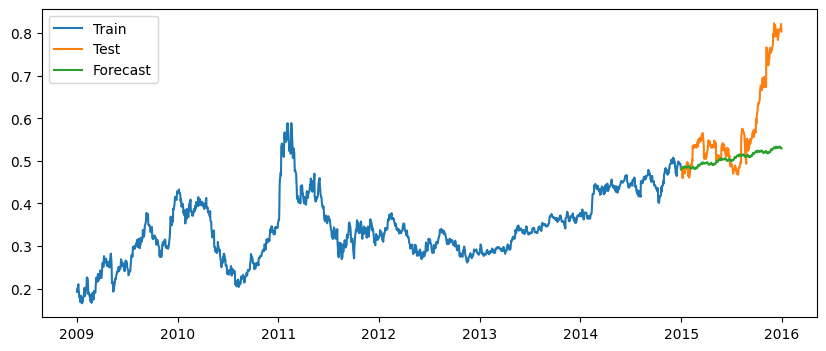

RMSE: 0.11, MAE: 0.08 MAPE: 0.11 R2: -0.24


In [7]:
# Read CSV skipping the first two metadata rows
df = pd.read_csv('NVDA.csv', skiprows=3, header=None)

# Set proper column names
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)

# Ensure daily frequency and interpolate missing Close values
df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

train = df.loc['2009-01-01':'2014-12-31']['Close']
test = df.loc['2015-01-01':'2015-12-31']['Close']

model = SARIMAX(train, order=(2,1,2), seasonal_order=(0,1,1,66), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

forecast = results.forecast(steps=len(test))
plt.figure(figsize=(10,4))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()

# Metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mape = mean_absolute_percentage_error(test, forecast)
r2 = r2_score(test, forecast)
print(f'RMSE: {rmse:.2f}, MAE: {mae:.2f}', f'MAPE: {mape:.2f}', f'R2: {r2:.2f}')

SPY.

<ipython-input-8-f8f07676570d>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Close'].interpolate(method='time', inplace=True)


Period Train:2018-01-01 to 2023-12-31, Test:2024-01-01 to 2024-12-31
  RMSE: 56.18, MAE: 49.35, MAPE: 0.0890, R2: -1.16



/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Period Train:2015-01-01 to 2020-12-31, Test:2021-01-01 to 2021-12-31
  RMSE: 32.74, MAE: 28.75, MAPE: 0.0689, R2: -0.30

Period Train:2012-01-01 to 2017-12-31, Test:2018-01-01 to 2018-12-31
  RMSE: 12.27, MAE: 8.43, MAPE: 0.0353, R2: -0.75

Period Train:2009-01-01 to 2014-12-31, Test:2015-01-01 to 2015-12-31
  RMSE: 10.79, MAE: 8.15, MAPE: 0.0475, R2: -4.93



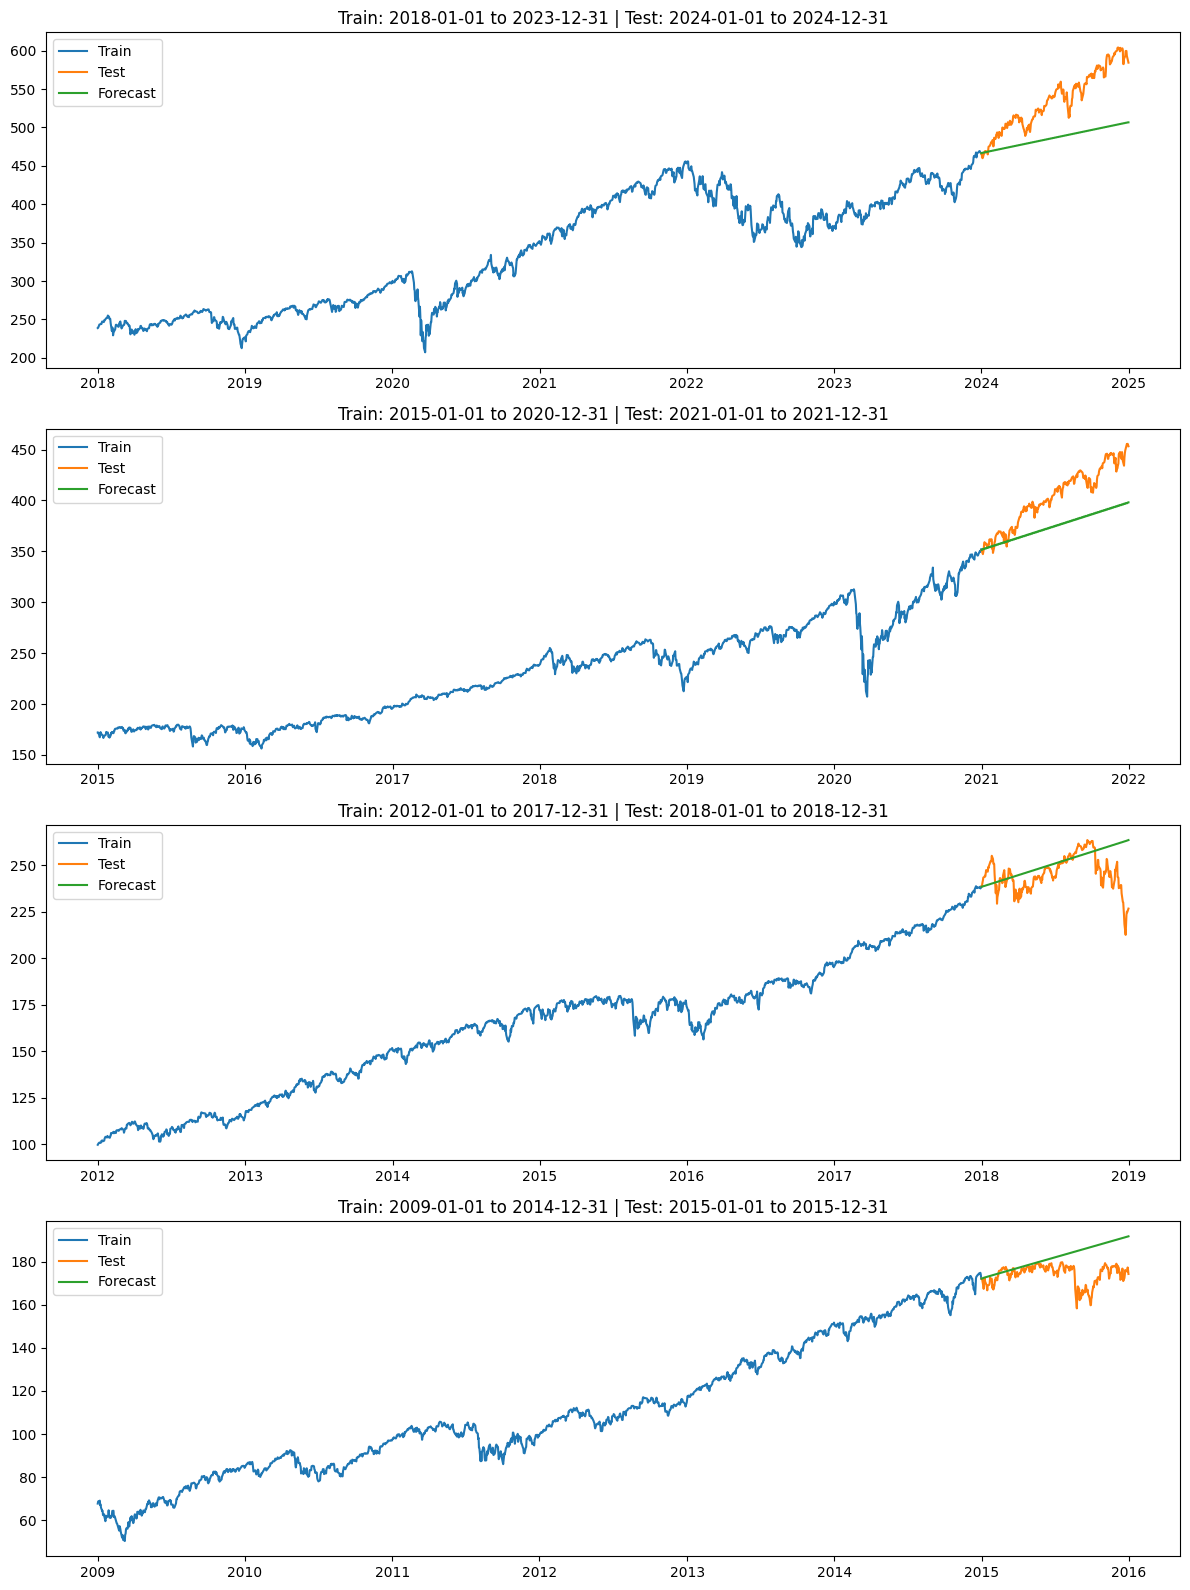

Average Metrics Over 4 Periods:
RMSE: 27.99
MAE: 23.67
MAPE: 0.0602
R2: -1.78


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Read CSV skipping the first two metadata rows
df = pd.read_csv('SPY.csv', skiprows=3, header=None)
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)

df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

periods = [
    ('2018-01-01', '2023-12-31', '2024-01-01', '2024-12-31'),
    ('2015-01-01', '2020-12-31', '2021-01-01', '2021-12-31'),
    ('2012-01-01', '2017-12-31', '2018-01-01', '2018-12-31'),
    ('2009-01-01', '2014-12-31', '2015-01-01', '2015-12-31')
]

rmse_list, mae_list, mape_list, r2_list = [], [], [], []

# Prepare subplots: 4 rows, 1 col
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 16), sharex=False)

for i, (train_start, train_end, test_start, test_end) in enumerate(periods):
    train = df.loc[train_start:train_end]['Close']
    test = df.loc[test_start:test_end]['Close']

    model = SARIMAX(train, order=(2,1,3), seasonal_order=(1,1,1,5),
                    enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=False)

    forecast = results.forecast(steps=len(test))

    rmse = np.sqrt(mean_squared_error(test, forecast))
    mae = mean_absolute_error(test, forecast)
    mape = mean_absolute_percentage_error(test, forecast)
    r2 = r2_score(test, forecast)

    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)
    r2_list.append(r2)

    print(f'Period Train:{train_start} to {train_end}, Test:{test_start} to {test_end}')
    print(f'  RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.4f}, R2: {r2:.2f}\n')

    ax = axes[i]
    ax.plot(train.index, train, label='Train')
    ax.plot(test.index, test, label='Test')
    ax.plot(test.index, forecast, label='Forecast')
    ax.set_title(f'Train: {train_start} to {train_end} | Test: {test_start} to {test_end}')
    ax.legend()

plt.tight_layout()
plt.show()

print('Average Metrics Over 4 Periods:')
print(f'RMSE: {np.mean(rmse_list):.2f}')
print(f'MAE: {np.mean(mae_list):.2f}')
print(f'MAPE: {np.mean(mape_list):.4f}')
print(f'R2: {np.mean(r2_list):.2f}')



Grid search for period: Train 2018-01-01–2023-12-31, Test 2024-01-01–2024-12-31
Best SARIMA order=(1, 1, 2), seasonal_order=(1, 1, 0, 22), RMSE=49.54
Final Metrics - RMSE: 49.54, MAE: 41.46, MAPE: 0.0748, R2: -0.68

Grid search for period: Train 2015-01-01–2020-12-31, Test 2021-01-01–2021-12-31
Best SARIMA order=(1, 1, 0), seasonal_order=(1, 1, 0, 22), RMSE=12.23
Final Metrics - RMSE: 12.23, MAE: 8.97, MAPE: 0.0217, R2: 0.82

Grid search for period: Train 2012-01-01–2017-12-31, Test 2018-01-01–2018-12-31
Best SARIMA order=(0, 1, 0), seasonal_order=(1, 1, 0, 5), RMSE=10.16
Final Metrics - RMSE: 10.16, MAE: 7.46, MAPE: 0.0309, R2: -0.20

Grid search for period: Train 2009-01-01–2014-12-31, Test 2015-01-01–2015-12-31
Best SARIMA order=(1, 1, 0), seasonal_order=(0, 1, 0, 22), RMSE=5.58
Final Metrics - RMSE: 5.58, MAE: 4.48, MAPE: 0.0259, R2: -0.59


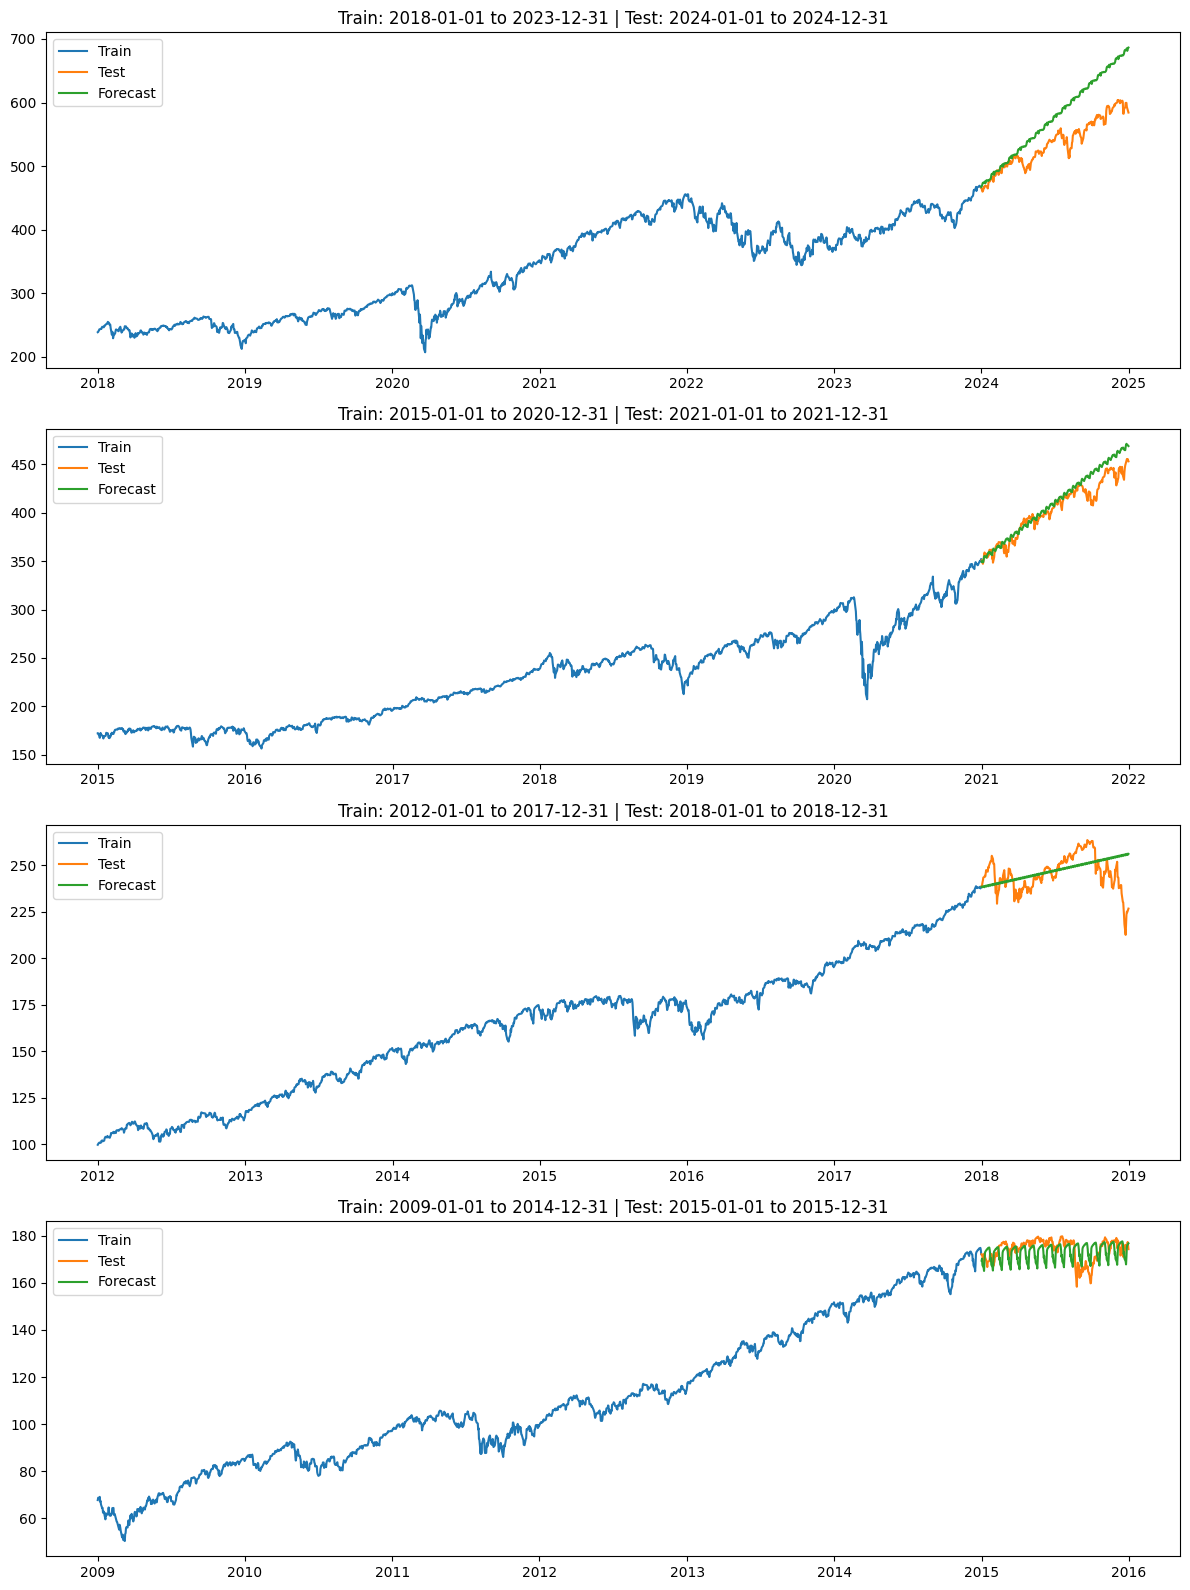


Average Metrics Over 4 Periods:
RMSE: 19.38
MAE: 15.59
MAPE: 0.0383
R2: -0.16


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from itertools import product
import warnings
warnings.filterwarnings('ignore')

# Load and preprocess data
df = pd.read_csv('SPY.csv', skiprows=3, header=None)
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)
df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

# Define sliding windows
periods = [
    ('2018-01-01', '2023-12-31', '2024-01-01', '2024-12-31'),
    ('2015-01-01', '2020-12-31', '2021-01-01', '2021-12-31'),
    ('2012-01-01', '2017-12-31', '2018-01-01', '2018-12-31'),
    ('2009-01-01', '2014-12-31', '2015-01-01', '2015-12-31')
]

# Hyperparameter grids
p = d = q = range(0, 3)
P = D = Q = range(0, 2)
m_values = [5, 22]  # Try both weekly and trading-week seasonality

rmse_list, mae_list, mape_list, r2_list = [], [], [], []

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 16), sharex=False)

for i, (train_start, train_end, test_start, test_end) in enumerate(periods):
    train = df.loc[train_start:train_end]['Close']
    test = df.loc[test_start:test_end]['Close']

    best_rmse = float('inf')
    best_order = None
    best_seasonal_order = None
    best_forecast = None

    print(f"\nGrid search for period: Train {train_start}–{train_end}, Test {test_start}–{test_end}")

    for order in product(p, [1], q):  # Fix d=1
        for seasonal_order in product(P, [1], Q, m_values):  # Fix D=1
            try:
                model = SARIMAX(train, order=order, seasonal_order=seasonal_order,
                                enforce_stationarity=False, enforce_invertibility=False)
                results = model.fit(disp=False)
                forecast = results.forecast(steps=len(test))
                rmse = np.sqrt(mean_squared_error(test, forecast))

                if rmse < best_rmse:
                    best_rmse = rmse
                    best_order = order
                    best_seasonal_order = seasonal_order
                    best_forecast = forecast
            except:
                continue

    # Final model with best params
    print(f"Best SARIMA order={best_order}, seasonal_order={best_seasonal_order}, RMSE={best_rmse:.2f}")

    model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order,
                    enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=False)
    forecast = results.forecast(steps=len(test))

    # Metrics
    rmse = np.sqrt(mean_squared_error(test, forecast))
    mae = mean_absolute_error(test, forecast)
    mape = mean_absolute_percentage_error(test, forecast)
    r2 = r2_score(test, forecast)

    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)
    r2_list.append(r2)

    print(f"Final Metrics - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.4f}, R2: {r2:.2f}")

    # Plot
    ax = axes[i]
    ax.plot(train.index, train, label='Train')
    ax.plot(test.index, test, label='Test')
    ax.plot(test.index, forecast, label='Forecast')
    ax.set_title(f'Train: {train_start} to {train_end} | Test: {test_start} to {test_end}')
    ax.legend()

plt.tight_layout()
plt.show()

# Print average metrics
print('\nAverage Metrics Over 4 Periods:')
print(f'RMSE: {np.mean(rmse_list):.2f}')
print(f'MAE: {np.mean(mae_list):.2f}')
print(f'MAPE: {np.mean(mape_list):.4f}')
print(f'R2: {np.mean(r2_list):.2f}')



--- Fold 1: Train 2018-01-01 to 2021-12-31, Test 2022-01-01 to 2022-12-31 ---
Best Params: order=(2, 1, 2), seasonal_order=(0, 1, 0, 5), RMSE=22.65
MAE: 19.04, MAPE: 0.0493, R2: 0.27


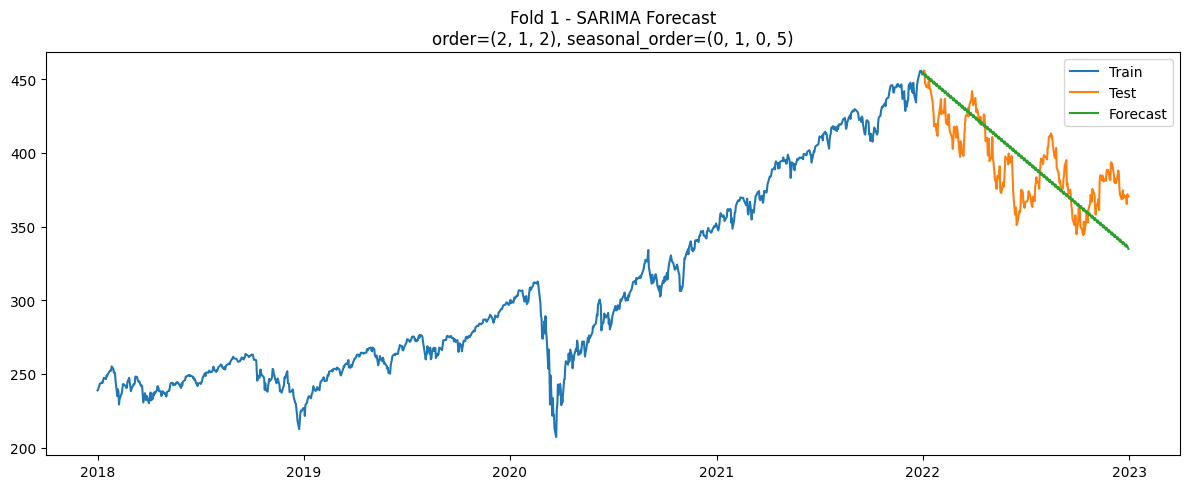


--- Fold 2: Train 2019-01-01 to 2022-12-31, Test 2023-01-01 to 2023-12-31 ---
Best Params: order=(0, 1, 2), seasonal_order=(0, 1, 1, 5), RMSE=32.44
MAE: 28.43, MAPE: 0.0663, R2: -0.80


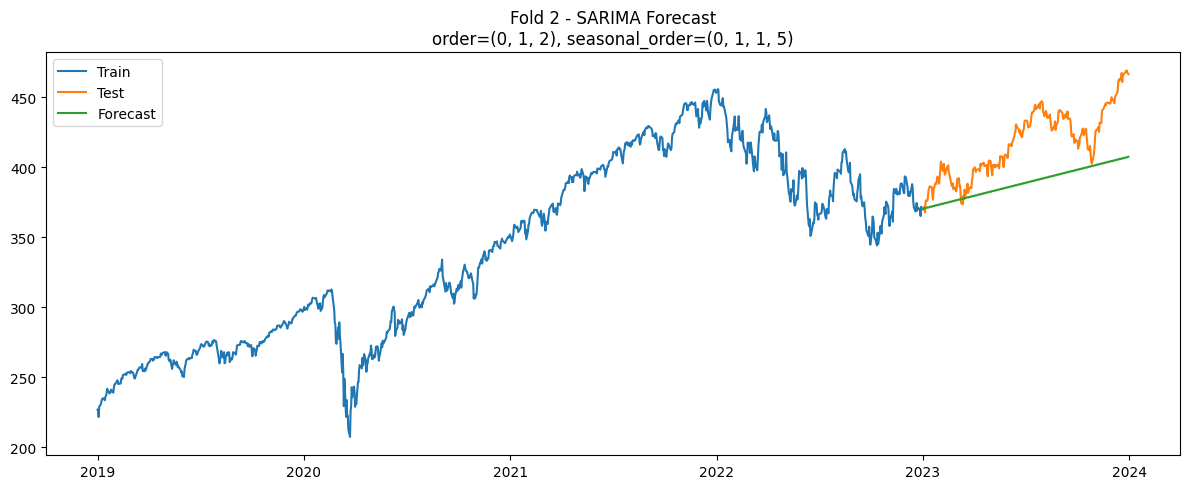

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from itertools import product
from joblib import Parallel, delayed
import warnings
import gc
warnings.filterwarnings('ignore')

# Load and preprocess data
df = pd.read_csv('SPY.csv', skiprows=3, header=None)
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)
df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

# Define folds
folds = [
    ('2018-01-01', '2021-12-31', '2022-01-01', '2022-12-31'),
    ('2019-01-01', '2022-12-31', '2023-01-01', '2023-12-31')
]

# Hyperparameter grid
p = q = range(0, 3)
P = Q = range(0, 2)
D = d = [1]
m_values = [5, 22]
param_grid = list(product(p, d, q, P, D, Q, m_values))

# Evaluation function
def evaluate_sarima(train, test, order_params):
    p, d, q, P, D, Q, m = order_params
    try:
        model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, m),
                        enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False)
        forecast = results.forecast(len(test))
        rmse = np.sqrt(mean_squared_error(test, forecast))
        return (rmse, (p, d, q), (P, D, Q, m), forecast)
    except:
        return (np.inf, None, None, None)

# Run folds
for i, (train_start, train_end, test_start, test_end) in enumerate(folds, start=1):
    print(f"\n--- Fold {i}: Train {train_start} to {train_end}, Test {test_start} to {test_end} ---")
    train = df.loc[train_start:train_end]['Close']
    test = df.loc[test_start:test_end]['Close']

    results = Parallel(n_jobs=-1)(delayed(evaluate_sarima)(train, test, params) for params in param_grid)
    best_result = min(results, key=lambda x: x[0])

    best_rmse, best_order, best_seasonal_order, best_forecast = best_result
    print(f"Best Params: order={best_order}, seasonal_order={best_seasonal_order}, RMSE={best_rmse:.2f}")

    # Fit final model with best params
    model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order,
                    enforce_stationarity=False, enforce_invertibility=False)
    fitted = model.fit(disp=False)
    forecast = fitted.forecast(len(test))

    # Metrics
    mae = mean_absolute_error(test, forecast)
    mape = mean_absolute_percentage_error(test, forecast)
    r2 = r2_score(test, forecast)
    print(f"MAE: {mae:.2f}, MAPE: {mape:.4f}, R2: {r2:.2f}")

    # Plot
    plt.figure(figsize=(12, 5))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(test.index, forecast, label='Forecast')
    plt.title(f"Fold {i} - SARIMA Forecast\norder={best_order}, seasonal_order={best_seasonal_order}")
    plt.legend()
    plt.tight_layout()
    plt.show()

    del model, fitted, forecast
    gc.collect()


Starting ARIMA grid search...
Best ARIMA order: (2, 1, 2) with RMSE: 65.8666

Starting SARIMA seasonal grid search...
Best SARIMA seasonal order: (0, 1, 0, 5) with RMSE: 22.6459


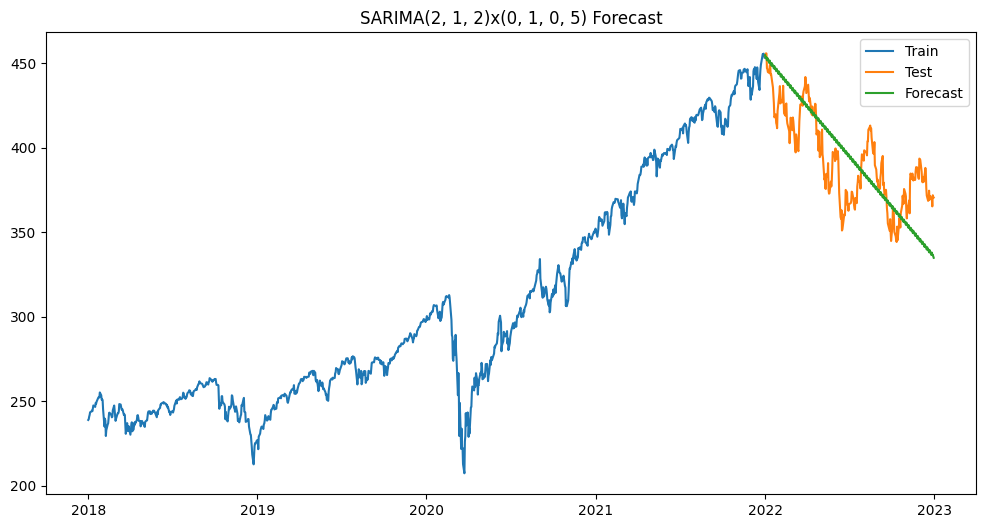

Final Model Metrics:
RMSE: 22.6459
MAE: 19.0373
MAPE: 0.0493
R2: 0.2666


In [14]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from itertools import product
import warnings
warnings.filterwarnings('ignore')

# Load and preprocess your data
df = pd.read_csv('SPY.csv', skiprows=3, header=None)
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)
df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

# Define your train and test split for tuning
train_start = '2018-01-01'
train_end = '2021-12-31'
test_start = '2022-01-01'
test_end = '2022-12-31'

train = df.loc[train_start:train_end]['Close']
test = df.loc[test_start:test_end]['Close']

# Step 1: Grid search ARIMA parameters (p,d,q)
p = d = q = range(0, 3)  # typical small ranges
arima_params = list(product(p, d, q))

best_arima_rmse = float('inf')
best_arima_order = None

print("Starting ARIMA grid search...")
for order in arima_params:
    try:
        model = SARIMAX(train, order=order, enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False)
        forecast = results.forecast(steps=len(test))
        rmse = np.sqrt(mean_squared_error(test, forecast))
        if rmse < best_arima_rmse:
            best_arima_rmse = rmse
            best_arima_order = order
    except:
        continue

print(f"Best ARIMA order: {best_arima_order} with RMSE: {best_arima_rmse:.4f}")

# Step 2: For best ARIMA order, grid search seasonal (P,D,Q,m)
P = D = Q = range(0, 2)  # smaller seasonal range
m_values = [5, 22]  # weekly and monthly seasonality in trading days

seasonal_params = list(product(P, D, Q, m_values))

best_sarima_rmse = float('inf')
best_seasonal_order = None

print("\nStarting SARIMA seasonal grid search...")
for seasonal_order in seasonal_params:
    try:
        model = SARIMAX(train, order=best_arima_order,
                        seasonal_order=seasonal_order,
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        results = model.fit(disp=False)
        forecast = results.forecast(steps=len(test))
        rmse = np.sqrt(mean_squared_error(test, forecast))
        if rmse < best_sarima_rmse:
            best_sarima_rmse = rmse
            best_seasonal_order = seasonal_order
    except:
        continue

print(f"Best SARIMA seasonal order: {best_seasonal_order} with RMSE: {best_sarima_rmse:.4f}")

# Fit final model with best params
final_model = SARIMAX(train, order=best_arima_order,
                      seasonal_order=best_seasonal_order,
                      enforce_stationarity=False,
                      enforce_invertibility=False)
final_results = final_model.fit(disp=False)
final_forecast = final_results.forecast(steps=len(test))

# Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, final_forecast, label='Forecast')
plt.title(f'SARIMA{best_arima_order}x{best_seasonal_order} Forecast')
plt.legend()
plt.show()

# Print metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

mae = mean_absolute_error(test, final_forecast)
mape = mean_absolute_percentage_error(test, final_forecast)
r2 = r2_score(test, final_forecast)

print(f"Final Model Metrics:")
print(f"RMSE: {best_sarima_rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"R2: {r2:.4f}")


Starting ARIMA grid search...
Best ARIMA order: (0, 1, 4) with RMSE: 65.8658

Starting SARIMA seasonal grid search...
Best SARIMA seasonal order: (0, 1, 0, 5) with RMSE: 22.1187


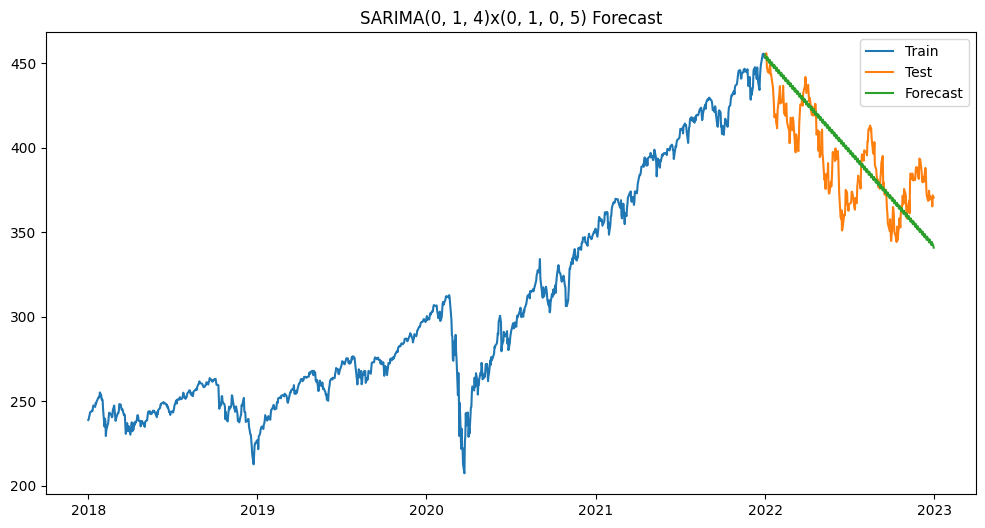

Final Model Metrics:
RMSE: 22.1187
MAE: 18.6547
MAPE: 0.0484
R2: 0.3004


In [3]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from itertools import product
import warnings
warnings.filterwarnings('ignore')

# Load and preprocess your data
df = pd.read_csv('SPY.csv', skiprows=3, header=None)
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)
df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

# Define your train and test split for tuning
train_start = '2018-01-01'
train_end = '2021-12-31'
test_start = '2022-01-01'
test_end = '2022-12-31'

train = df.loc[train_start:train_end]['Close']
test = df.loc[test_start:test_end]['Close']

# Step 1: Grid search ARIMA parameters (p,d,q)
p = range(0, 3)
q = range(0, 5)  # typical small ranges
d = [1]
arima_params = list(product(p, d, q))

best_arima_rmse = float('inf')
best_arima_order = None

print("Starting ARIMA grid search...")
for order in arima_params:
    try:
        model = SARIMAX(train, order=order, enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False)
        forecast = results.forecast(steps=len(test))
        rmse = np.sqrt(mean_squared_error(test, forecast))
        if rmse < best_arima_rmse:
            best_arima_rmse = rmse
            best_arima_order = order
    except:
        continue

print(f"Best ARIMA order: {best_arima_order} with RMSE: {best_arima_rmse:.4f}")

# Step 2: For best ARIMA order, grid search seasonal (P,D,Q,m)
P = Q = range(0, 2)  # smaller seasonal range
D = [1]
m_values = [5, 22, 66]  # weekly and monthly seasonality in trading days

seasonal_params = list(product(P, D, Q, m_values))

best_sarima_rmse = float('inf')
best_seasonal_order = None

print("\nStarting SARIMA seasonal grid search...")
for seasonal_order in seasonal_params:
    try:
        model = SARIMAX(train, order=best_arima_order,
                        seasonal_order=seasonal_order,
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        results = model.fit(disp=False)
        forecast = results.forecast(steps=len(test))
        rmse = np.sqrt(mean_squared_error(test, forecast))
        if rmse < best_sarima_rmse:
            best_sarima_rmse = rmse
            best_seasonal_order = seasonal_order
    except:
        continue

print(f"Best SARIMA seasonal order: {best_seasonal_order} with RMSE: {best_sarima_rmse:.4f}")

# Fit final model with best params
final_model = SARIMAX(train, order=best_arima_order,
                      seasonal_order=best_seasonal_order,
                      enforce_stationarity=False,
                      enforce_invertibility=False)
final_results = final_model.fit(disp=False)
final_forecast = final_results.forecast(steps=len(test))

# Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, final_forecast, label='Forecast')
plt.title(f'SARIMA{best_arima_order}x{best_seasonal_order} Forecast')
plt.legend()
plt.show()

# Print metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

mae = mean_absolute_error(test, final_forecast)
mape = mean_absolute_percentage_error(test, final_forecast)
r2 = r2_score(test, final_forecast)

print(f"Final Model Metrics:")
print(f"RMSE: {best_sarima_rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"R2: {r2:.4f}")


In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from itertools import product
import warnings
warnings.filterwarnings('ignore')

# Load and preprocess your data
df = pd.read_csv('SPY.csv', skiprows=3, header=None)
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)
df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

# Define your train and test split for tuning
train_start = '2019-01-01'
train_end = '2022-12-31'
test_start = '2023-01-01'
test_end = '2023-12-31'

train = df.loc[train_start:train_end]['Close']
test = df.loc[test_start:test_end]['Close']

# Step 1: Grid search ARIMA parameters (p,d,q)
p = range(0, 3)
q = range(0, 5)  # typical small ranges
d = [1]
arima_params = list(product(p, d, q))

best_arima_rmse = float('inf')
best_arima_order = None

print("Starting ARIMA grid search...")
for order in arima_params:
    try:
        model = SARIMAX(train, order=order, enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False)
        forecast = results.forecast(steps=len(test))
        rmse = np.sqrt(mean_squared_error(test, forecast))
        if rmse < best_arima_rmse:
            best_arima_rmse = rmse
            best_arima_order = order
    except:
        continue

print(f"Best ARIMA order: {best_arima_order} with RMSE: {best_arima_rmse:.4f}")

# Step 2: For best ARIMA order, grid search seasonal (P,D,Q,m)
P = Q = range(0, 2)  # smaller seasonal range
D = [1]
m_values = [5, 22]  # weekly and monthly seasonality in trading days

seasonal_params = list(product(P, D, Q, m_values))

best_sarima_rmse = float('inf')
best_seasonal_order = None

print("\nStarting SARIMA seasonal grid search...")
for seasonal_order in seasonal_params:
    try:
        model = SARIMAX(train, order=best_arima_order,
                        seasonal_order=seasonal_order,
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        results = model.fit(disp=False)
        forecast = results.forecast(steps=len(test))
        rmse = np.sqrt(mean_squared_error(test, forecast))
        if rmse < best_sarima_rmse:
            best_sarima_rmse = rmse
            best_seasonal_order = seasonal_order
    except:
        continue

print(f"Best SARIMA seasonal order: {best_seasonal_order} with RMSE: {best_sarima_rmse:.4f}")

# Fit final model with best params
final_model = SARIMAX(train, order=best_arima_order,
                      seasonal_order=best_seasonal_order,
                      enforce_stationarity=False,
                      enforce_invertibility=False)
final_results = final_model.fit(disp=False)
final_forecast = final_results.forecast(steps=len(test))

# Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, final_forecast, label='Forecast')
plt.title(f'SARIMA{best_arima_order}x{best_seasonal_order} Forecast')
plt.legend()
plt.show()

# Print metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

mae = mean_absolute_error(test, final_forecast)
mape = mean_absolute_percentage_error(test, final_forecast)
r2 = r2_score(test, final_forecast)

print(f"Final Model Metrics:")
print(f"RMSE: {best_sarima_rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"R2: {r2:.4f}")


Starting ARIMA grid search...
Best ARIMA order: (2, 1, 3) with RMSE: 52.5126

Starting SARIMA seasonal grid search...
Best SARIMA seasonal order: (0, 1, 1, 66) with RMSE: 32.1724


KeyboardInterrupt: 


Fold 1 - Train: 2018-01-01 to 2020-12-31 | Test: 2021-01-01 to 2021-12-31
Best ARIMA order: (0, 1, 4), RMSE: 58.5463
Best Seasonal order: (1, 1, 0, 22), RMSE: 15.6268
Fold 1 Metrics:
  RMSE: 15.6268
  MAE:  11.9434
  MAPE: 0.0287
  R2:   0.7045


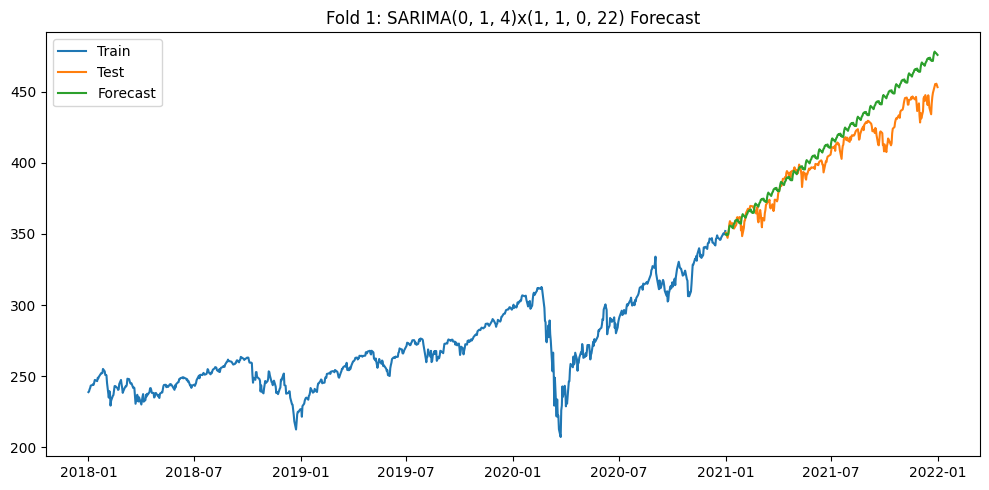


Fold 2 - Train: 2019-01-01 to 2021-12-31 | Test: 2022-01-01 to 2022-12-31
Best ARIMA order: (0, 1, 4), RMSE: 65.8506
Best Seasonal order: (0, 1, 0, 5), RMSE: 24.4772
Fold 2 Metrics:
  RMSE: 24.4772
  MAE:  20.0996
  MAPE: 0.0526
  R2:   0.1432


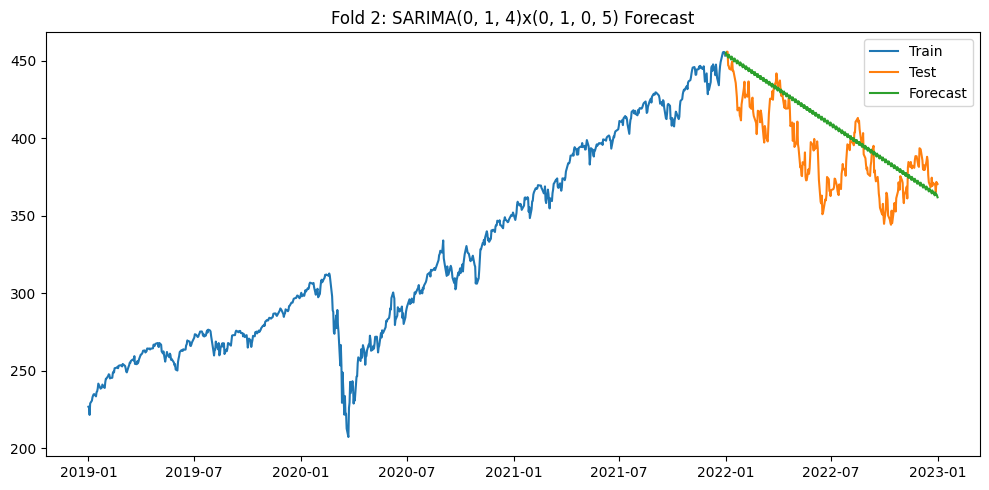


Fold 3 - Train: 2020-01-01 to 2022-12-31 | Test: 2023-01-01 to 2023-12-31
Best ARIMA order: (2, 1, 2), RMSE: 52.1666
Best Seasonal order: (0, 1, 1, 22), RMSE: 40.1246
Fold 3 Metrics:
  RMSE: 40.1246
  MAE:  35.6547
  MAPE: 0.0832
  R2:   -1.7522


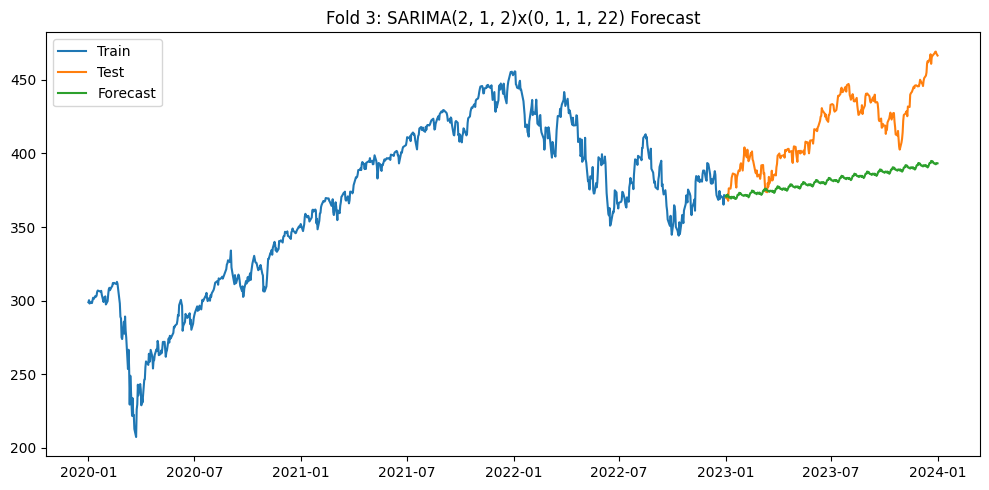

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from itertools import product
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings('ignore')

# Load and preprocess data
df = pd.read_csv('SPY.csv', skiprows=3, header=None)
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)
df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

# Define folds
folds = [
    ('2018-01-01', '2020-12-31', '2021-01-01', '2021-12-31'),
    ('2019-01-01', '2021-12-31', '2022-01-01', '2022-12-31'),
    ('2020-01-01', '2022-12-31', '2023-01-01', '2023-12-31')
]

# Hyperparameter ranges
p = range(0, 3)
q = range(0, 5)
P = Q = range(0, 2)
D = d = [1]
m_values = [5, 22]
arima_params = list(product(p, d, q))
seasonal_params = list(product(P, D, Q, m_values))

# Helper functions
def evaluate_arima(train, test, order):
    try:
        model = SARIMAX(train, order=order, enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False)
        forecast = results.forecast(len(test))
        rmse = np.sqrt(mean_squared_error(test, forecast))
        return (order, rmse)
    except:
        return (order, np.inf)

def evaluate_seasonal(train, test, arima_order, seasonal_order):
    try:
        model = SARIMAX(train, order=arima_order, seasonal_order=seasonal_order,
                        enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False)
        forecast = results.forecast(len(test))
        rmse = np.sqrt(mean_squared_error(test, forecast))
        return (seasonal_order, rmse)
    except:
        return (seasonal_order, np.inf)

# Run folds
for i, (train_start, train_end, test_start, test_end) in enumerate(folds, 1):
    print(f"\nFold {i} - Train: {train_start} to {train_end} | Test: {test_start} to {test_end}")
    train = df.loc[train_start:train_end]['Close']
    test = df.loc[test_start:test_end]['Close']

    # ARIMA Grid Search
    arima_results = Parallel(n_jobs=-1)(delayed(evaluate_arima)(train, test, order) for order in arima_params)
    best_arima_order, best_arima_rmse = min(arima_results, key=lambda x: x[1])
    print(f"Best ARIMA order: {best_arima_order}, RMSE: {best_arima_rmse:.4f}")

    # Seasonal Grid Search
    seasonal_results = Parallel(n_jobs=-1)(
        delayed(evaluate_seasonal)(train, test, best_arima_order, seasonal_order)
        for seasonal_order in seasonal_params
    )
    best_seasonal_order, best_seasonal_rmse = min(seasonal_results, key=lambda x: x[1])
    print(f"Best Seasonal order: {best_seasonal_order}, RMSE: {best_seasonal_rmse:.4f}")

    # Fit final model
    model = SARIMAX(train, order=best_arima_order, seasonal_order=best_seasonal_order,
                    enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=False)
    forecast = results.forecast(len(test))

    # Metrics
    rmse = np.sqrt(mean_squared_error(test, forecast))
    mae = mean_absolute_error(test, forecast)
    mape = mean_absolute_percentage_error(test, forecast)
    r2 = r2_score(test, forecast)

    print(f"Fold {i} Metrics:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  MAPE: {mape:.4f}")
    print(f"  R2:   {r2:.4f}")

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(test.index, forecast, label='Forecast')
    plt.title(f'Fold {i}: SARIMA{best_arima_order}x{best_seasonal_order} Forecast')
    plt.legend()
    plt.tight_layout()
    plt.show()


0, 1, 4. 0, 1, 1, 22.

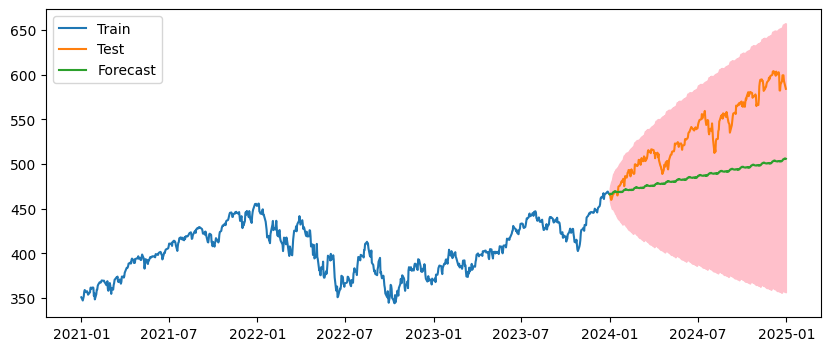

RMSE: 56.88, MAE: 49.89 MAPE: 0.09 R2: -1.21


In [6]:
# Read CSV skipping the first two metadata rows
df = pd.read_csv('SPY.csv', skiprows=3, header=None)

# Set proper column names
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)

# Ensure daily frequency and interpolate missing Close values
df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

train = df.loc['2021-01-01':'2023-12-31']['Close']
test = df.loc['2024-01-01':'2024-12-31']['Close']

model = SARIMAX(train, order=(0,1,4), seasonal_order=(0,1,1,22), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

forecast_result = results.get_forecast(steps=len(test))
forecast_mean = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int()

plt.figure(figsize=(10,4))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.legend()
plt.show()

# Metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mape = mean_absolute_percentage_error(test, forecast)
r2 = r2_score(test, forecast)
print(f'RMSE: {rmse:.2f}, MAE: {mae:.2f}', f'MAPE: {mape:.2f}', f'R2: {r2:.2f}')

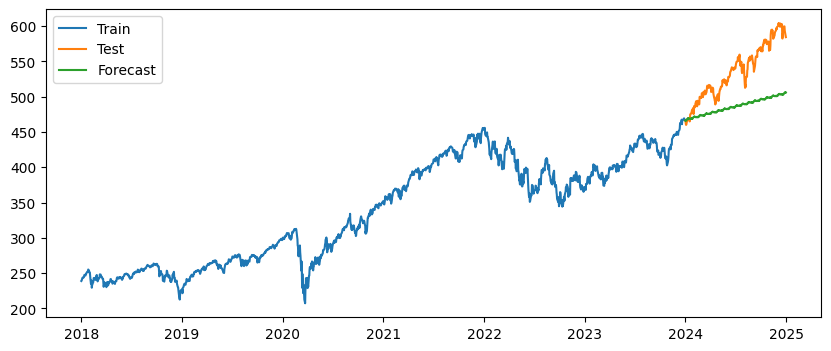

RMSE: 56.91, MAE: 49.92 MAPE: 0.09 R2: -1.21


In [4]:
# Read CSV skipping the first two metadata rows
df = pd.read_csv('SPY.csv', skiprows=3, header=None)

# Set proper column names
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)

# Ensure daily frequency and interpolate missing Close values
df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

train = df.loc['2018-01-01':'2023-12-31']['Close']
test = df.loc['2024-01-01':'2024-12-31']['Close']

model = SARIMAX(train, order=(2,1,3), seasonal_order=(1,1,1,22), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

forecast = results.forecast(steps=len(test))
plt.figure(figsize=(10,4))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()

# Metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mape = mean_absolute_percentage_error(test, forecast)
r2 = r2_score(test, forecast)
print(f'RMSE: {rmse:.2f}, MAE: {mae:.2f}', f'MAPE: {mape:.2f}', f'R2: {r2:.2f}')

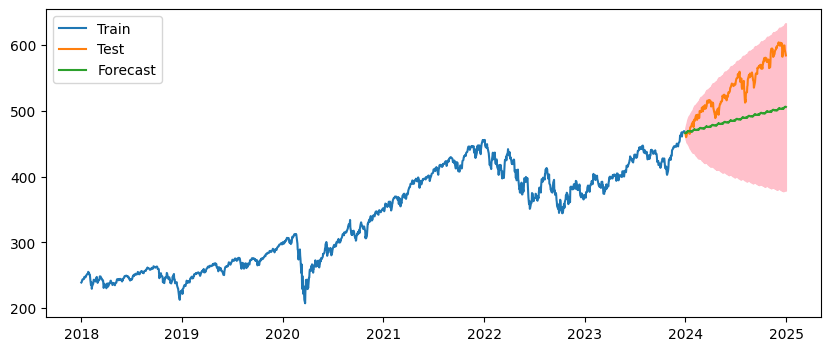

RMSE: 56.88, MAE: 49.89 MAPE: 0.09 R2: -1.21


In [7]:
# Read CSV skipping the first two metadata rows
df = pd.read_csv('SPY.csv', skiprows=3, header=None)

# Set proper column names
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)

# Ensure daily frequency and interpolate missing Close values
df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

train = df.loc['2018-01-01':'2023-12-31']['Close']
test = df.loc['2024-01-01':'2024-12-31']['Close']

model = SARIMAX(train, order=(2,1,2), seasonal_order=(0,1,1,22), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)
forecast_result = results.get_forecast(steps=len(test))
forecast_mean = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int()
plt.figure(figsize=(10,4))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.legend()
plt.show()

# Metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mape = mean_absolute_percentage_error(test, forecast)
r2 = r2_score(test, forecast)
print(f'RMSE: {rmse:.2f}, MAE: {mae:.2f}', f'MAPE: {mape:.2f}', f'R2: {r2:.2f}')


Fold 1 - Train: 2018-01-01 to 2020-12-31 | Test: 2021-01-01 to 2021-12-31
Best ARIMA order: (2, 1, 4), RMSE: 16.7601
Best Seasonal order: (0, 1, 1, 22), RMSE: 11.0203
Fold 1 Metrics:
  RMSE: 11.0251
  MAE:  9.2554
  MAPE: 0.0697
  R2:   0.4205


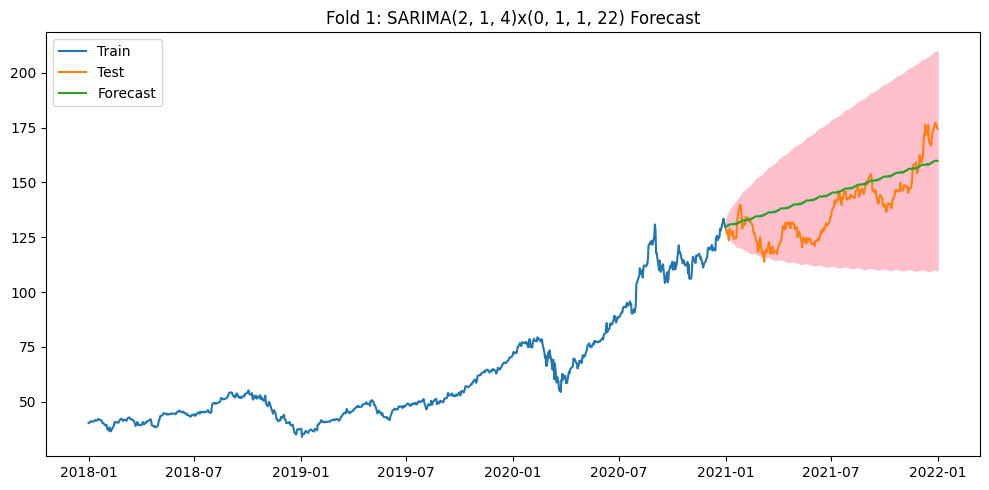


Fold 2 - Train: 2019-01-01 to 2021-12-31 | Test: 2022-01-01 to 2022-12-31
Best ARIMA order: (2, 1, 0), RMSE: 25.3358
Best Seasonal order: (0, 1, 1, 22), RMSE: 51.1379
Fold 2 Metrics:
  RMSE: 51.1379
  MAE:  45.3849
  MAPE: 0.3114
  R2:   -15.2528


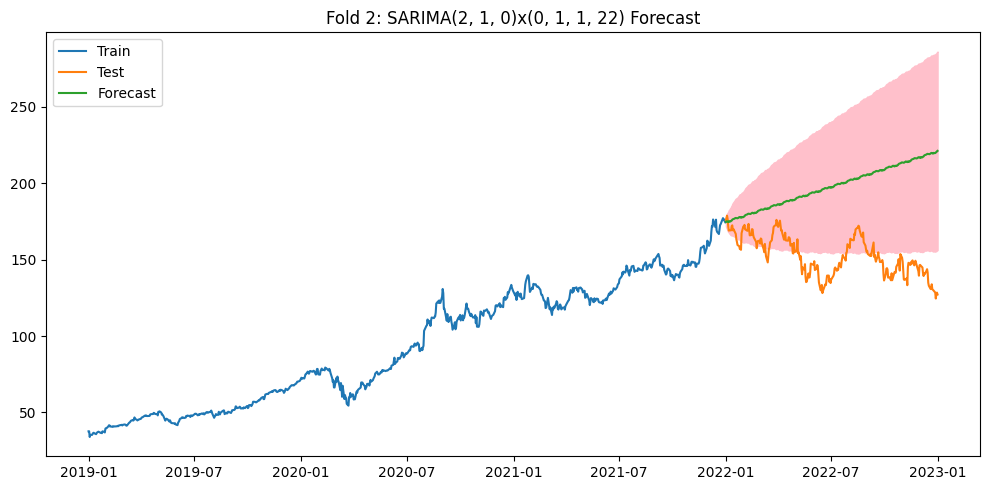


Fold 3 - Train: 2020-01-01 to 2022-12-31 | Test: 2023-01-01 to 2023-12-31
Best ARIMA order: (2, 1, 3), RMSE: 47.1108
Best Seasonal order: (1, 1, 1, 5), RMSE: 37.2953
Fold 3 Metrics:
  RMSE: 37.2953
  MAE:  34.8186
  MAPE: 0.1972
  R2:   -3.4993


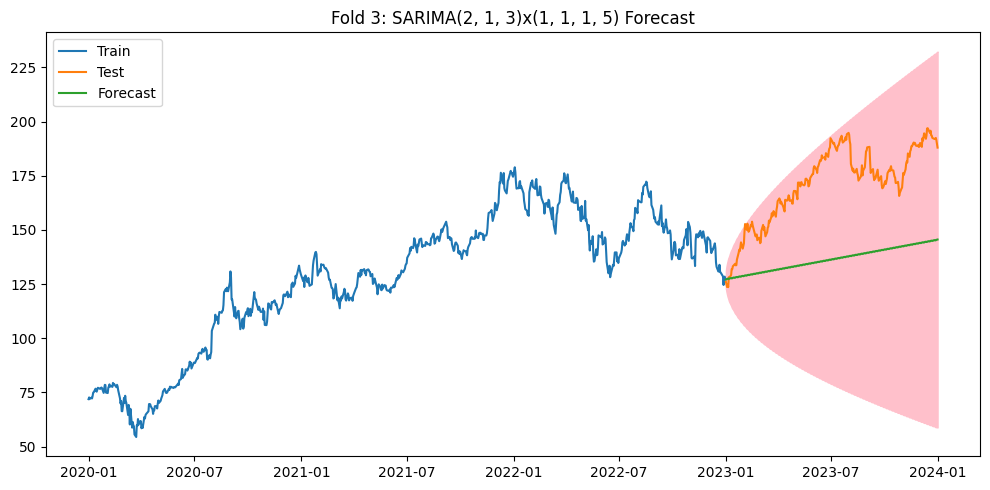

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from itertools import product
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings('ignore')
import gc # Import garbage collection module

# Load and preprocess data
df = pd.read_csv('AAPL.csv', skiprows=3, header=None)
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)
df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

# Define folds
folds = [
    ('2018-01-01', '2020-12-31', '2021-01-01', '2021-12-31'),
    ('2019-01-01', '2021-12-31', '2022-01-01', '2022-12-31'),
    ('2020-01-01', '2022-12-31', '2023-01-01', '2023-12-31')
]

# Hyperparameter ranges
p = range(0, 3)
q = range(0, 5)
P = range(0, 2)
D = d = Q = [1]
m_values = [5, 22]
arima_params = list(product(p, d, q))
seasonal_params = list(product(P, D, Q, m_values))

# Helper functions
def evaluate_arima(train, test, order):
    try:
        model = SARIMAX(train, order=order, enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False)
        # Use get_forecast to ensure the returned object can provide predicted_mean
        forecast_result = results.get_forecast(len(test))
        rmse = np.sqrt(mean_squared_error(test, forecast_result.predicted_mean))
        return (order, rmse)
    except:
        return (order, np.inf)

def evaluate_seasonal(train, test, arima_order, seasonal_order):
    try:
        model = SARIMAX(train, order=arima_order, seasonal_order=seasonal_order,
                        enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False)
        # Use get_forecast to ensure the returned object can provide predicted_mean
        forecast_result = results.get_forecast(len(test))
        rmse = np.sqrt(mean_squared_error(test, forecast_result.predicted_mean))
        return (seasonal_order, rmse)
    except:
        return (seasonal_order, np.inf)

# Run folds
for i, (train_start, train_end, test_start, test_end) in enumerate(folds, 1):
    print(f"\nFold {i} - Train: {train_start} to {train_end} | Test: {test_start} to {test_end}")
    train = df.loc[train_start:train_end]['Close']
    test = df.loc[test_start:test_end]['Close']

    # ARIMA Grid Search
    # Ensure train and test are passed correctly to parallel functions
    arima_results = Parallel(n_jobs=-1)(delayed(evaluate_arima)(train, test, order) for order in arima_params)
    best_arima_order, best_arima_rmse = min(arima_results, key=lambda x: x[1])
    print(f"Best ARIMA order: {best_arima_order}, RMSE: {best_arima_rmse:.4f}")

    # Seasonal Grid Search
    # Ensure train and test are passed correctly to parallel functions
    seasonal_results = Parallel(n_jobs=-1)(
        delayed(evaluate_seasonal)(train, test, best_arima_order, seasonal_order)
        for seasonal_order in seasonal_params
    )
    best_seasonal_order, best_seasonal_rmse = min(seasonal_results, key=lambda x: x[1])
    print(f"Best Seasonal order: {best_seasonal_order}, RMSE: {best_seasonal_rmse:.4f}")

    # Fit final model
    model = SARIMAX(train, order=best_arima_order, seasonal_order=best_seasonal_order,
                    enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=False)
    forecast_result = results.get_forecast(steps=len(test))
    forecast_mean = forecast_result.predicted_mean
    forecast_ci = forecast_result.conf_int()


    # Metrics
    # Use forecast_mean for metrics
    rmse = np.sqrt(mean_squared_error(test, forecast_mean))
    mae = mean_absolute_error(test, forecast_mean)
    mape = mean_absolute_percentage_error(test, forecast_mean)
    r2 = r2_score(test, forecast_mean)

    print(f"Fold {i} Metrics:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  MAPE: {mape:.4f}")
    print(f"  R2:   {r2:.4f}")

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    # Use forecast_mean for plotting the forecast line
    plt.plot(test.index, forecast_mean, label='Forecast')
    plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
    plt.title(f'Fold {i}: SARIMA{best_arima_order}x{best_seasonal_order} Forecast')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Explicitly delete large objects and collect garbage
    del model, results, forecast_result, forecast_mean, forecast_ci
    gc.collect()


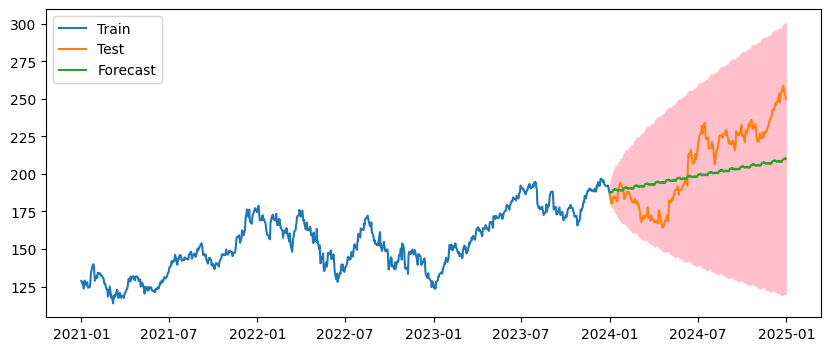

RMSE: 21.73, MAE: 19.04 MAPE: 0.09 R2: 0.28


In [12]:
# Read CSV skipping the first two metadata rows
df = pd.read_csv('AAPL.csv', skiprows=3, header=None)

# Set proper column names
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)

# Ensure daily frequency and interpolate missing Close values
df = df.asfreq('D')
df['Close'].interpolate(method='time', inplace=True)

train = df.loc['2021-01-01':'2023-12-31']['Close']
test = df.loc['2024-01-01':'2024-12-31']['Close']

model = SARIMAX(train, order=(2,1,3), seasonal_order=(0,1,1,22), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)
forecast_result = results.get_forecast(steps=len(test))
forecast = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int()
plt.figure(figsize=(10,4))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.legend()
plt.show()

# Metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mape = mean_absolute_percentage_error(test, forecast)
r2 = r2_score(test, forecast)
print(f'RMSE: {rmse:.2f}, MAE: {mae:.2f}', f'MAPE: {mape:.2f}', f'R2: {r2:.2f}')